Loading Libraries

In [570]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
import warnings
warnings.filterwarnings('ignore')

#Task A: Linear & Polynomial Regression

Loading the dataset

In [571]:
house_data = pd.read_csv('/content/HousePricePrediction.csv')

In [572]:
house_data.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Target Variable: SalePrice

In [573]:
house_data = house_data.drop('Id', axis=1)

Checking for Null values

In [574]:
print(house_data.isnull().sum())

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64


In [575]:
columns_to_check = [col for col in house_data.columns if col != 'SalePrice']
for col in columns_to_check:
    unique_values = house_data[col].unique()
    if len(unique_values) <= 20:
        print(f"Unique values in column '{col}': {unique_values}")

Unique values in column 'MSSubClass': [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
Unique values in column 'MSZoning': ['RL' 'RM' 'C (all)' 'FV' 'RH']
Unique values in column 'Street': ['Pave' 'Grvl']
Unique values in column 'Alley': [nan 'Grvl' 'Pave']
Unique values in column 'LotShape': ['Reg' 'IR1' 'IR2' 'IR3']
Unique values in column 'LandContour': ['Lvl' 'Bnk' 'Low' 'HLS']
Unique values in column 'Utilities': ['AllPub' 'NoSeWa']
Unique values in column 'LotConfig': ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Unique values in column 'LandSlope': ['Gtl' 'Mod' 'Sev']
Unique values in column 'Condition1': ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Unique values in column 'Condition2': ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Unique values in column 'BldgType': ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
Unique values in column 'HouseStyle': ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
Unique values 

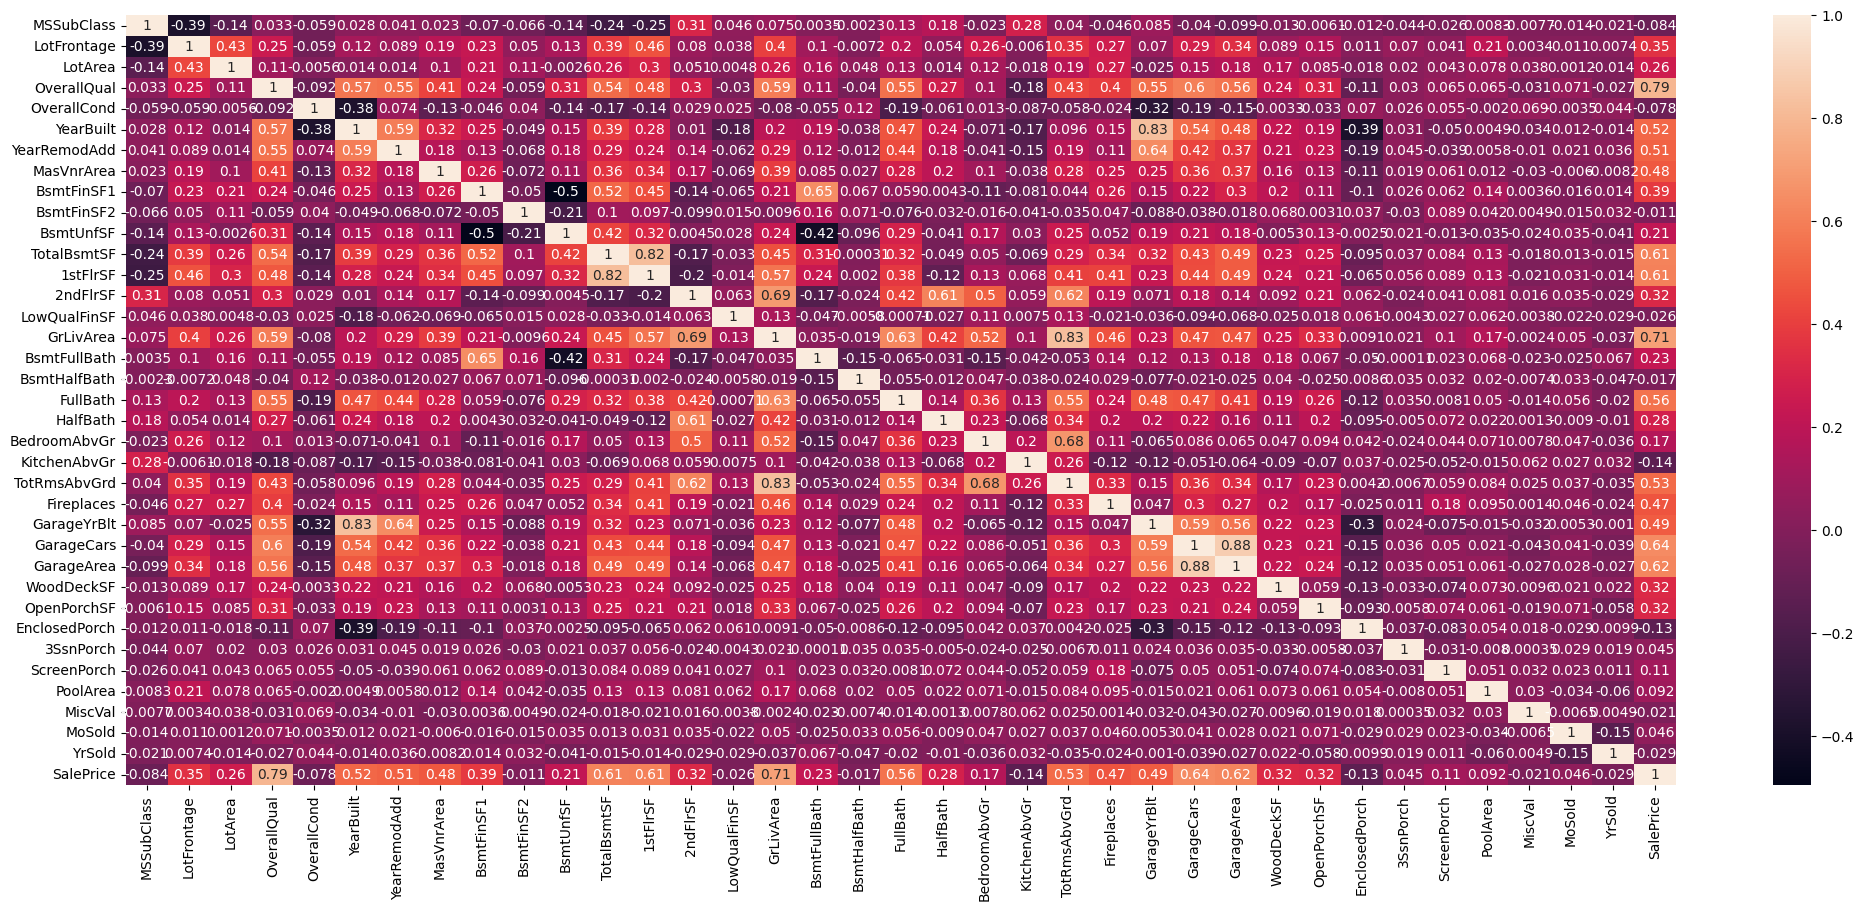

In [576]:
plt.figure(figsize = (25,10))
sb.heatmap(house_data.corr(),annot = True);

Top 4 features having positive correlation with SalePrice:
1. OverallQual - 0.79
2. GrLivArea - 0.71
3. GarrageCars - 0.64
4. TotalBsmtSF - 0.61

Since GarrageCars and GarrageArea have high correlation but both are highly correlated with each other, we might consider only one of the two features (GarrageCars, since it has higher correlation value compared to GarrageCars) and go for TotalMsmtSF as the next highly correlated feature

In [577]:
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
house_data = house_data[selected_features + ['SalePrice']]
house_data.head(10)

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,SalePrice
0,7,1710,2,856,208500
1,6,1262,2,1262,181500
2,7,1786,2,920,223500
3,7,1717,3,756,140000
4,8,2198,3,1145,250000
5,5,1362,2,796,143000
6,8,1694,2,1686,307000
7,7,2090,2,1107,200000
8,7,1774,2,952,129900
9,5,1077,1,991,118000


In [578]:
house_data.isnull().sum()

OverallQual    0
GrLivArea      0
GarageCars     0
TotalBsmtSF    0
SalePrice      0
dtype: int64

Since there are no null values in the final dataset, no need to replace/fill anything.

In [579]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OverallQual  1460 non-null   int64
 1   GrLivArea    1460 non-null   int64
 2   GarageCars   1460 non-null   int64
 3   TotalBsmtSF  1460 non-null   int64
 4   SalePrice    1460 non-null   int64
dtypes: int64(5)
memory usage: 57.2 KB


Since there are no categorical features, no feature transformation is required

In [580]:
house_data.describe()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1515.463699,1.767123,1057.429452,180921.195890
std,1.382997,525.480383,0.747315,438.705324,79442.502883
min,1.000000,334.000000,0.000000,0.000000,34900.000000
25%,5.000000,1129.500000,1.000000,795.750000,129975.000000
50%,6.000000,1464.000000,2.000000,991.500000,163000.000000
75%,7.000000,1776.750000,2.000000,1298.250000,214000.000000
max,10.000000,5642.000000,4.000000,6110.000000,755000.000000


Separating target variable from other features

In [581]:
X = house_data.drop(['SalePrice'], axis=1)
y = house_data['SalePrice']

print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (1460, 4)
y shape: (1460,)


In [582]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

print("Scaled X shape:", X_scaled.shape)
print("y shape:", y_scaled.shape)

Scaled X shape: (1460, 4)
y shape: (1460, 1)


In [583]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25, random_state = 42)

print('X_train:', X_train.shape)
print('X_test:X', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (1095, 4)
X_test:X (365, 4)
y_train: (1095, 1)
y_test: (365, 1)


Linear Regression

In [584]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [585]:
y_pred = lr.predict(X_train)

Polynomial Regression

In [586]:
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [587]:
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

LinearRegression()

In [588]:
y_pred_poly = pr.predict(X_train_poly)

Comparision

In [589]:
y_train_pred_linear = lr.predict(X_train)
y_test_pred_linear = lr.predict(X_test)

y_train_pred_poly = pr.predict(X_train_poly)
y_test_pred_poly = pr.predict(X_test_poly)

In [590]:
mae_train_linear = mean_absolute_error(y_train, y_train_pred_linear)
mae_test_linear = mean_absolute_error(y_test, y_test_pred_linear)
mae_train_poly = mean_absolute_error(y_train, y_train_pred_poly)
mae_test_poly = mean_absolute_error(y_test, y_test_pred_poly)

r2_train_linear = r2_score(y_train, y_train_pred_linear)
r2_test_linear = r2_score(y_test, y_test_pred_linear)
r2_train_poly = r2_score(y_train, y_train_pred_poly)
r2_test_poly = r2_score(y_test, y_test_pred_poly)

mse_train_linear = mean_squared_error(y_train, y_train_pred_linear)
mse_test_linear = mean_squared_error(y_test, y_test_pred_linear)
mse_train_poly = mean_squared_error(y_train, y_train_pred_poly)
mse_test_poly = mean_squared_error(y_test, y_test_pred_poly)

In [591]:
print(f"Train MAE: Linear Regression: {mae_train_linear}, Polynomial Regression: {mae_train_poly}")
print(f"Test MAE: Linear Regression: {mae_test_linear}, Polynomial Regression: {mae_test_poly}")

print(f"\nR-squared Train: Linear Regression: {r2_train_linear:.4f}, Polynomial Regression: {r2_train_poly:.4f}")
print(f"R-squared Test: Linear Regression: {r2_test_linear:.4f}, Polynomial Regression: {r2_test_poly:.4f}")

print(f"\nMSE Train: Linear Regression: {mse_train_linear:.4f}, Polynomial Regression: {mse_train_poly:.4f}")
print(f"MSE Test: Linear Regression: {mse_test_linear:.4f}, Polynomial Regression: {mse_test_poly:.4f}")

Train MAE: Linear Regression: 0.32098293536861844, Polynomial Regression: 0.2721316444201826
Test MAE: Linear Regression: 0.3115841765690531, Polynomial Regression: 0.2649738082912664

R-squared Train: Linear Regression: 0.7459, Polynomial Regression: 0.8323
R-squared Test: Linear Regression: 0.7943, Polynomial Regression: 0.8612

MSE Train: Linear Regression: 0.2446, Polynomial Regression: 0.1615
MSE Test: Linear Regression: 0.2285, Polynomial Regression: 0.1541


Conclusion:
Polynomial Regression is more accurate as compared to linear regression having less amount of errors and greater R2 score in both train and test sets.

#Task B: ANN

##Classification: Heart Dataset

Loading dataset

In [708]:
heart_data = pd.read_csv('/content/heart.csv')

In [709]:
heart_data.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


Checking unique values

In [710]:
columns_to_check = [col for col in heart_data.columns if col != 'target']
for col in columns_to_check:
    unique_values = heart_data[col].unique()
    if len(unique_values) <= 5:
        print(f"Unique values in column '{col}': {unique_values}")

Unique values in column 'sex': [1 0]
Unique values in column 'cp': [3 2 1 0]
Unique values in column 'fbs': [1 0]
Unique values in column 'restecg': [0 1 2]
Unique values in column 'exang': [0 1]
Unique values in column 'slope': [0 2 1]
Unique values in column 'ca': [0 2 1 3 4]
Unique values in column 'thal': [1 2 3 0]


Checking for null values

In [711]:
print(heart_data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [712]:
heart_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Since there are no categorical features, data transformation is not required

Scaling the values that are in higher range

In [713]:
features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for i in features:
    sc = StandardScaler()
    heart_data[i] = sc.fit_transform(heart_data[i].values.reshape(-1, 1))

In [714]:
heart_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1
5,0.290464,1,0,0.478391,-1.048678,0,1,-0.072018,0,-0.551783,1,0,1,1
6,0.180175,0,1,0.478391,0.922521,0,0,0.146634,0,0.224643,1,0,2,1
7,-1.143291,1,1,-0.663867,0.323431,0,1,1.021244,0,-0.896862,2,0,3,1
8,-0.260980,1,2,2.306004,-0.913400,1,1,0.540209,0,-0.465514,2,0,3,1
9,0.290464,1,2,1.049520,-1.512490,0,1,1.064975,0,0.483451,2,0,2,1


In [715]:
X = heart_data.iloc[:,1:]
y = heart_data['target']

print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (303, 13)
y shape: (303,)


Splitting the dataset into train, val and test sets

In [716]:
X_train, X_part, y_train, y_part = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_test, X_val, y_test, y_val = train_test_split(X_part, y_part, test_size = 0.1, random_state = 42)

In [717]:
print('X train shape:', X_train.shape)
print('X validation shape:', X_val.shape)
print('X test shape:', X_test.shape)
print('y train shape:', y_train.shape)
print('y validation shape:', y_val.shape)
print('y test shape:', y_test.shape)

X train shape: (242, 13)
X validation shape: (7, 13)
X test shape: (54, 13)
y train shape: (242,)
y validation shape: (7,)
y test shape: (54,)


###Method 1: Sequential Method

####Model 1

In [602]:
model1 = Sequential()
model1.add(Dense(64, activation='relu', input_shape=(13,)))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [603]:
print(model1.summary())

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_161 (Dense)           (None, 64)                896       
                                                                 
 dense_162 (Dense)           (None, 128)               8320      
                                                                 
 dense_163 (Dense)           (None, 64)                8256      
                                                                 
 dense_164 (Dense)           (None, 32)                2080      
                                                                 
 dense_165 (Dense)           (None, 1)                 33        
                                                                 
Total params: 19,585
Trainable params: 19,585
Non-trainable params: 0
_________________________________________________________________
None


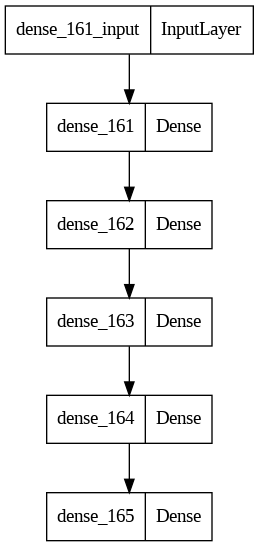

In [604]:
plot_model(model1)

Model compilation

In [605]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model fitting

In [606]:
history1 = model1.fit(X_train, y_train, epochs=20, batch_size=10, validation_data=(X_val, y_val))

Epoch 1/20
25/25 [==============================] - 1s 12ms/step - loss: 0.5095 - accuracy: 0.8017 - val_loss: 0.2471 - val_accuracy: 0.8571
Epoch 2/20
25/25 [==============================] - 0s 4ms/step - loss: 0.2384 - accuracy: 0.9050 - val_loss: 0.0795 - val_accuracy: 1.0000
Epoch 3/20
25/25 [==============================] - 0s 4ms/step - loss: 0.1169 - accuracy: 0.9545 - val_loss: 0.0518 - val_accuracy: 1.0000
Epoch 4/20
25/25 [==============================] - 0s 5ms/step - loss: 0.0517 - accuracy: 0.9835 - val_loss: 0.0245 - val_accuracy: 1.0000
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0236 - accuracy: 0.9959 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 6/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0221 - accuracy: 0.9959 - val_loss: 0.0092 - val_accuracy: 1.0000
Epoch 7/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 8/20
25/25 [=

Calculating test loss and accuracy

In [607]:
loss, accuracy = model1.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - accuracy: 1.0000
Test loss: 0.001011554733850062
Test accuracy: 1.0


In [608]:
def plot_function(history):
    fig, ax = plt.subplots(1, 2, figsize = (25,8))
    ax[0].plot(history.history['loss'], color='red', label='train_loss')
    ax[0].set_title('Loss and val_loss')
    ax[0].plot(history.history['val_loss'], color='green', label='val_loss')
    ax[0].legend()
    ax[1].plot(history.history['accuracy'], color='orange', label ='train_accuracy')
    ax[1].set_title('accuracy and val_accuracy')
    ax[1].plot(history.history['val_accuracy'], color='black', label='val_accuarcy')
    ax[1].legend()

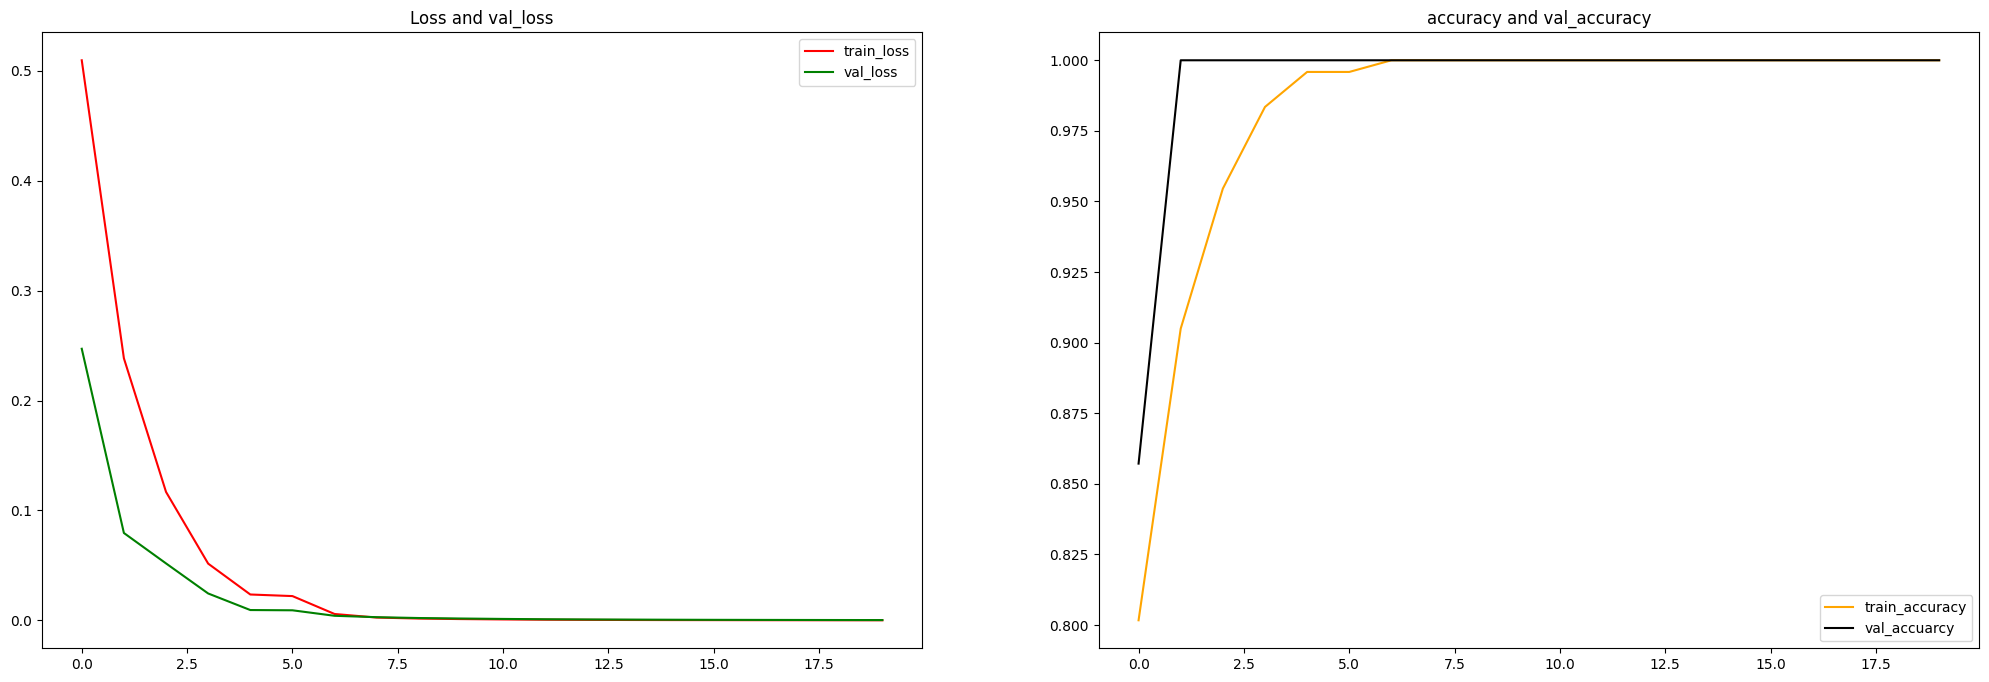

In [609]:
plot_function(history1)

####Model 2

In [610]:
model2 = Sequential()
model2.add(Dense(64, activation='relu', input_shape=(13,)))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [611]:
print(model2.summary())

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_166 (Dense)           (None, 64)                896       
                                                                 
 dense_167 (Dense)           (None, 128)               8320      
                                                                 
 dense_168 (Dense)           (None, 64)                8256      
                                                                 
 dense_169 (Dense)           (None, 32)                2080      
                                                                 
 dense_170 (Dense)           (None, 1)                 33        
                                                                 
Total params: 19,585
Trainable params: 19,585
Non-trainable params: 0
_________________________________________________________________
None


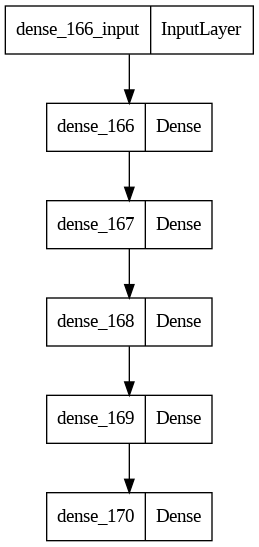

In [612]:
plot_model(model2)

Model compilation

In [613]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model fitting

In [614]:
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
8/8 [==============================] - 1s 33ms/step - loss: 0.6697 - accuracy: 0.5702 - val_loss: 0.5754 - val_accuracy: 0.8571
Epoch 2/50
8/8 [==============================] - 0s 7ms/step - loss: 0.5300 - accuracy: 0.7645 - val_loss: 0.4126 - val_accuracy: 1.0000
Epoch 3/50
8/8 [==============================] - 0s 7ms/step - loss: 0.4304 - accuracy: 0.8471 - val_loss: 0.2833 - val_accuracy: 1.0000
Epoch 4/50
8/8 [==============================] - 0s 10ms/step - loss: 0.3241 - accuracy: 0.8678 - val_loss: 0.1918 - val_accuracy: 1.0000
Epoch 5/50
8/8 [==============================] - 0s 7ms/step - loss: 0.2365 - accuracy: 0.9132 - val_loss: 0.1269 - val_accuracy: 1.0000
Epoch 6/50
8/8 [==============================] - 0s 10ms/step - loss: 0.1624 - accuracy: 0.9421 - val_loss: 0.0837 - val_accuracy: 1.0000
Epoch 7/50
8/8 [==============================] - 0s 8ms/step - loss: 0.0962 - accuracy: 0.9752 - val_loss: 0.0582 - val_accuracy: 1.0000
Epoch 8/50
8/8 [===============

Calculating test loss and accuracy

In [615]:
loss, accuracy = model2.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

2/2 [==============================] - 0s 8ms/step - loss: 0.0088 - accuracy: 1.0000
Test loss: 0.008839978836476803
Test accuracy: 1.0


In [616]:
def plot_function(history):
    fig, ax = plt.subplots(1, 2, figsize = (25,8))
    ax[0].plot(history.history['loss'], color='red', label='train_loss')
    ax[0].set_title('Loss and val_loss')
    ax[0].plot(history.history['val_loss'], color='green', label='val_loss')
    ax[0].legend()
    ax[1].plot(history.history['accuracy'], color='orange', label ='train_accuracy')
    ax[1].set_title('accuracy and val_accuracy')
    ax[1].plot(history.history['val_accuracy'], color='black', label='val_accuarcy')
    ax[1].legend()

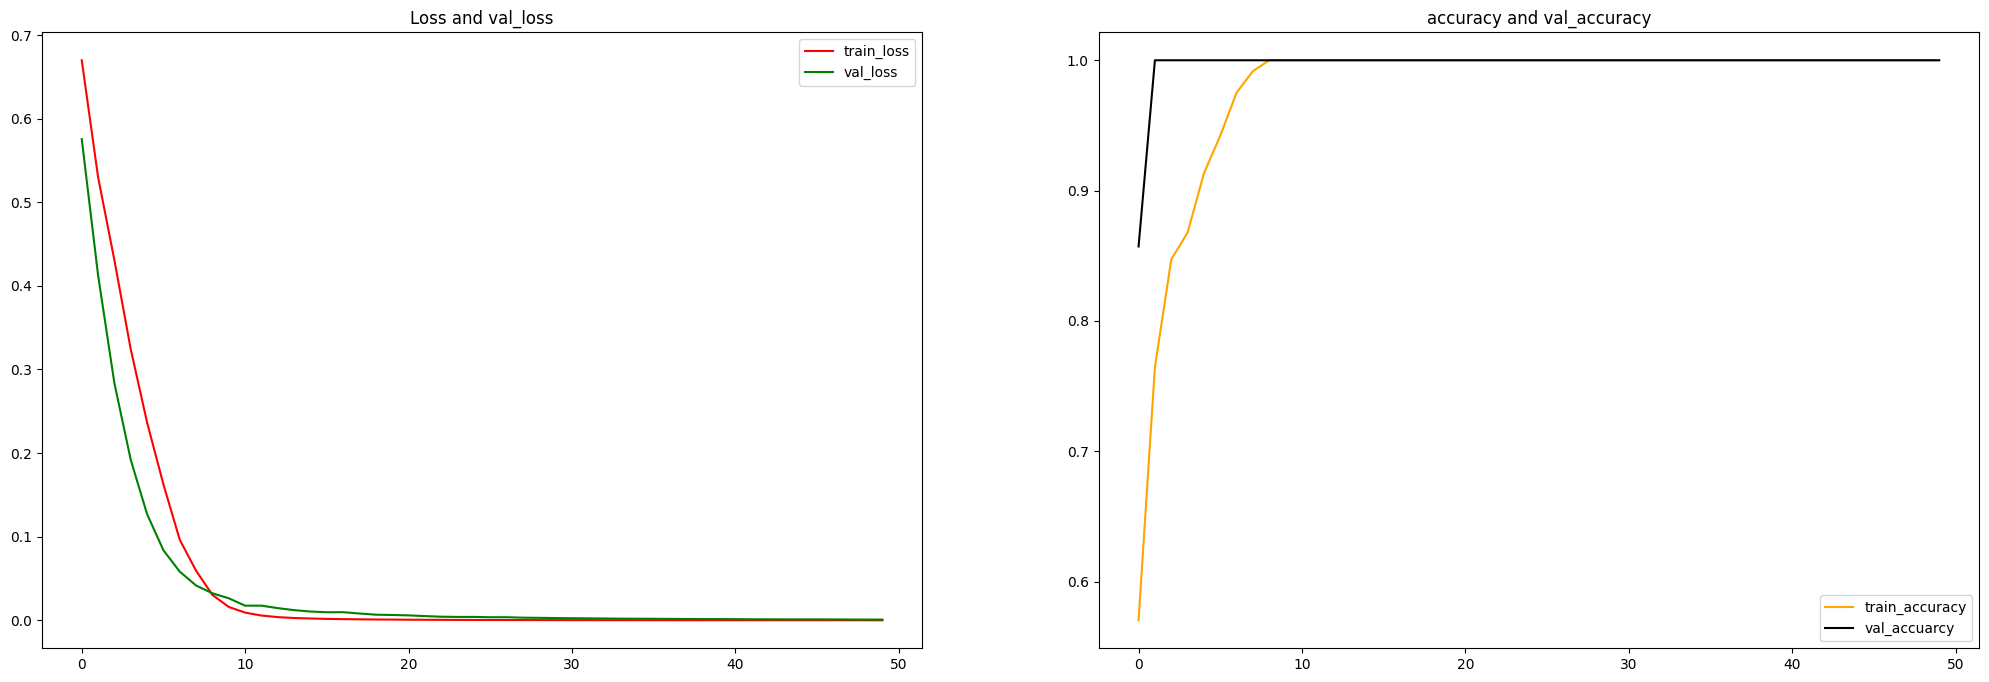

In [617]:
plot_function(history2)

####Model 3

In [618]:
model3 = Sequential()
model3.add(Dense(32, activation='relu', input_shape=(13,)))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

In [619]:
print(model3.summary())

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_171 (Dense)           (None, 32)                448       
                                                                 
 dense_172 (Dense)           (None, 128)               4224      
                                                                 
 dense_173 (Dense)           (None, 64)                8256      
                                                                 
 dense_174 (Dense)           (None, 32)                2080      
                                                                 
 dense_175 (Dense)           (None, 1)                 33        
                                                                 
Total params: 15,041
Trainable params: 15,041
Non-trainable params: 0
_________________________________________________________________
None


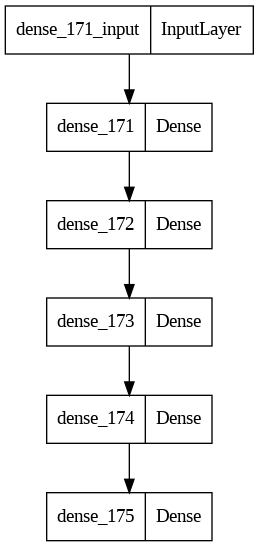

In [620]:
plot_model(model3)

Model compilation

In [621]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model fitting

In [622]:
history3 = model3.fit(X_train, y_train, epochs=100, batch_size=50, validation_data=(X_val, y_val))

Epoch 1/100
5/5 [==============================] - 2s 59ms/step - loss: 0.6774 - accuracy: 0.5537 - val_loss: 0.7229 - val_accuracy: 0.2857
Epoch 2/100
5/5 [==============================] - 0s 10ms/step - loss: 0.6224 - accuracy: 0.6818 - val_loss: 0.6845 - val_accuracy: 0.7143
Epoch 3/100
5/5 [==============================] - 0s 12ms/step - loss: 0.5659 - accuracy: 0.7603 - val_loss: 0.6421 - val_accuracy: 0.7143
Epoch 4/100
5/5 [==============================] - 0s 10ms/step - loss: 0.5051 - accuracy: 0.7975 - val_loss: 0.5678 - val_accuracy: 0.8571
Epoch 5/100
5/5 [==============================] - 0s 12ms/step - loss: 0.4338 - accuracy: 0.8554 - val_loss: 0.4791 - val_accuracy: 0.7143
Epoch 6/100
5/5 [==============================] - 0s 11ms/step - loss: 0.3583 - accuracy: 0.8884 - val_loss: 0.4011 - val_accuracy: 0.7143
Epoch 7/100
5/5 [==============================] - 0s 11ms/step - loss: 0.2931 - accuracy: 0.9008 - val_loss: 0.3357 - val_accuracy: 0.8571
Epoch 8/100
5/5 [===

Calculating test loss and accuracy

In [623]:
loss, accuracy = model3.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

2/2 [==============================] - 0s 11ms/step - loss: 0.0327 - accuracy: 0.9815
Test loss: 0.03271397948265076
Test accuracy: 0.9814814925193787


In [624]:
def plot_function(history):
    fig, ax = plt.subplots(1, 2, figsize = (25,8))
    ax[0].plot(history.history['loss'], color='red', label='train_loss')
    ax[0].set_title('Loss and val_loss')
    ax[0].plot(history.history['val_loss'], color='green', label='val_loss')
    ax[0].legend()
    ax[1].plot(history.history['accuracy'], color='orange', label ='train_accuracy')
    ax[1].set_title('accuracy and val_accuracy')
    ax[1].plot(history.history['val_accuracy'], color='black', label='val_accuarcy')
    ax[1].legend()

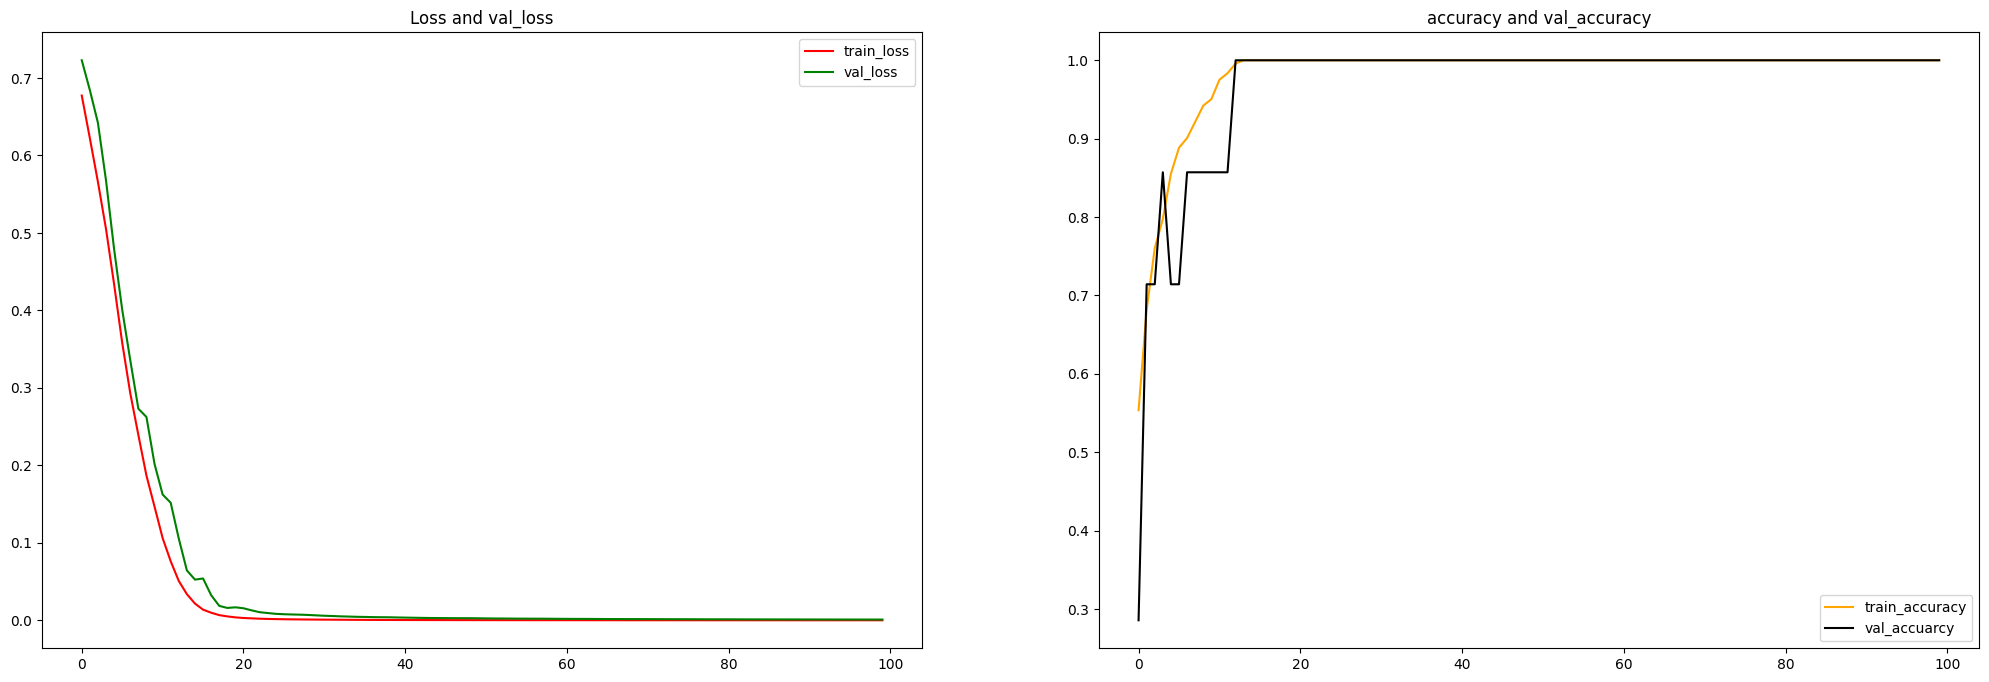

In [625]:
plot_function(history3)

####Model 4

In [626]:
model4 = Sequential()
model4.add(Dense(64, activation='relu', input_shape=(13,)))
model4.add(Dense(128, activation='relu'))
model4.add(Dense(64, activation='relu'))
model4.add(Dense(32, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))

In [627]:
print(model4.summary())

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_176 (Dense)           (None, 64)                896       
                                                                 
 dense_177 (Dense)           (None, 128)               8320      
                                                                 
 dense_178 (Dense)           (None, 64)                8256      
                                                                 
 dense_179 (Dense)           (None, 32)                2080      
                                                                 
 dense_180 (Dense)           (None, 1)                 33        
                                                                 
Total params: 19,585
Trainable params: 19,585
Non-trainable params: 0
_________________________________________________________________
None


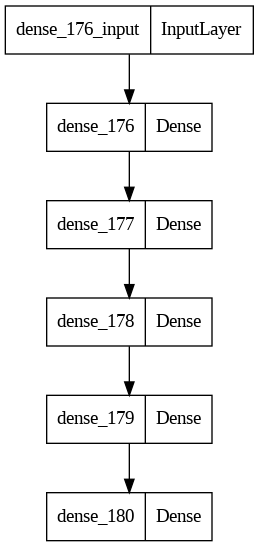

In [628]:
plot_model(model4)

Model compilation

In [629]:
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model fitting

In [630]:
history4 = model4.fit(X_train, y_train, epochs=100, batch_size=50, validation_data=(X_val, y_val))

Epoch 1/100
5/5 [==============================] - 1s 54ms/step - loss: 0.6600 - accuracy: 0.5992 - val_loss: 0.5830 - val_accuracy: 1.0000
Epoch 2/100
5/5 [==============================] - 0s 10ms/step - loss: 0.5887 - accuracy: 0.8554 - val_loss: 0.5082 - val_accuracy: 0.8571
Epoch 3/100
5/5 [==============================] - 0s 10ms/step - loss: 0.5166 - accuracy: 0.8719 - val_loss: 0.4150 - val_accuracy: 0.8571
Epoch 4/100
5/5 [==============================] - 0s 10ms/step - loss: 0.4257 - accuracy: 0.8760 - val_loss: 0.3331 - val_accuracy: 0.8571
Epoch 5/100
5/5 [==============================] - 0s 9ms/step - loss: 0.3354 - accuracy: 0.8884 - val_loss: 0.2535 - val_accuracy: 0.8571
Epoch 6/100
5/5 [==============================] - 0s 14ms/step - loss: 0.2574 - accuracy: 0.9050 - val_loss: 0.1912 - val_accuracy: 0.8571
Epoch 7/100
5/5 [==============================] - 0s 12ms/step - loss: 0.2087 - accuracy: 0.9380 - val_loss: 0.1584 - val_accuracy: 0.8571
Epoch 8/100
5/5 [====

Calculating test loss and accuracy

In [631]:
loss, accuracy = model4.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

2/2 [==============================] - 0s 7ms/step - loss: 3.8375e-04 - accuracy: 1.0000
Test loss: 0.0003837486729025841
Test accuracy: 1.0


In [632]:
def plot_function(history):
    fig, ax = plt.subplots(1, 2, figsize = (25,8))
    ax[0].plot(history.history['loss'], color='red', label='train_loss')
    ax[0].set_title('Loss and val_loss')
    ax[0].plot(history.history['val_loss'], color='green', label='val_loss')
    ax[0].legend()
    ax[1].plot(history.history['accuracy'], color='orange', label ='train_accuracy')
    ax[1].set_title('accuracy and val_accuracy')
    ax[1].plot(history.history['val_accuracy'], color='black', label='val_accuarcy')
    ax[1].legend()

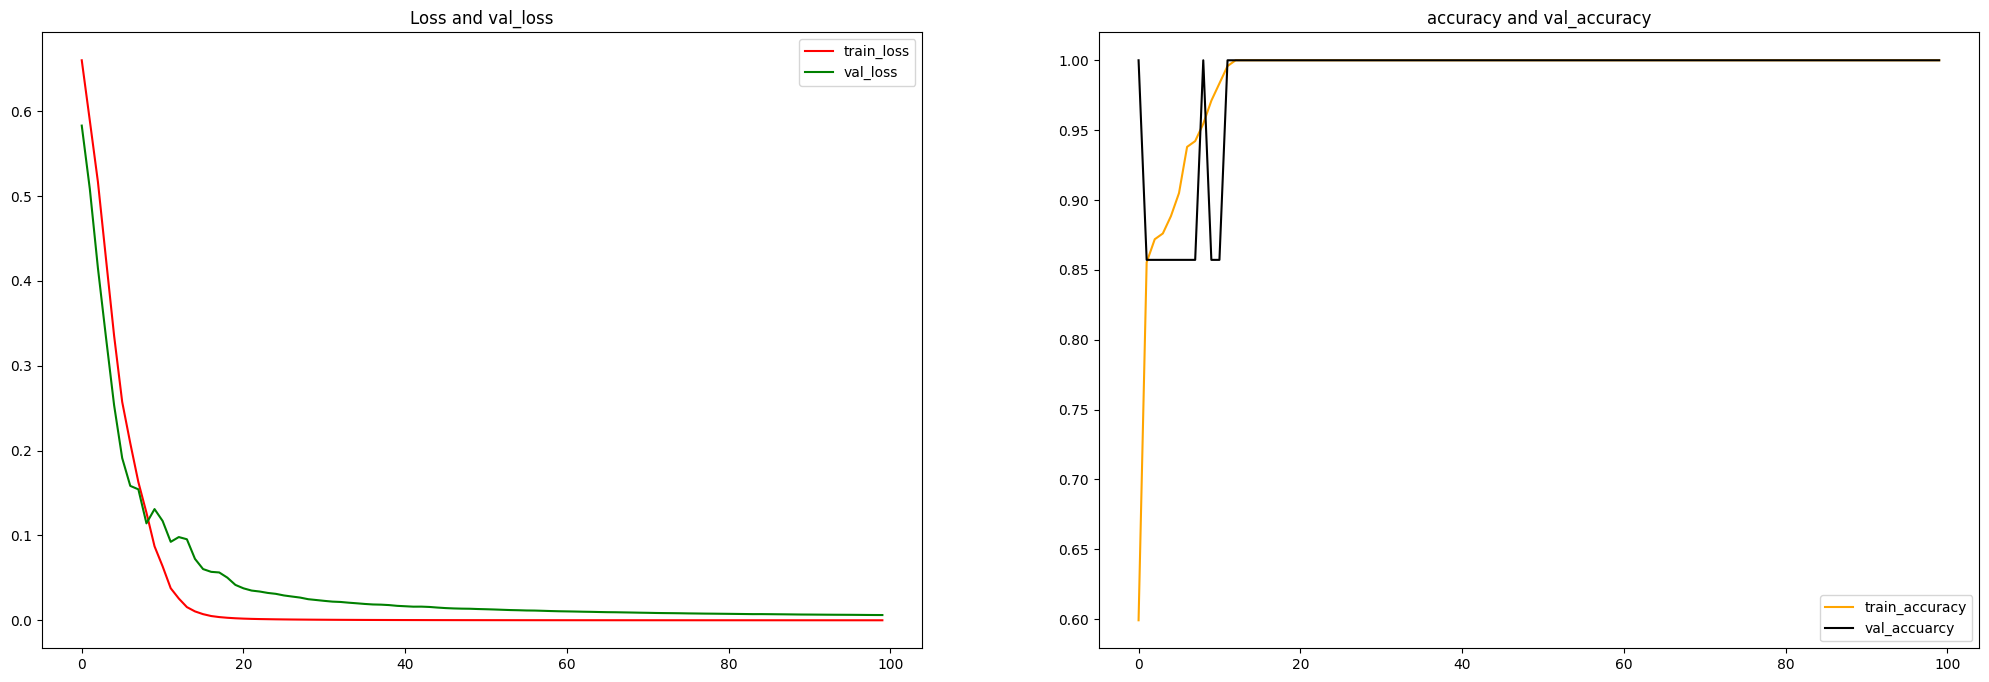

In [633]:
plot_function(history4)

Comparision: Model 4 performs the best, having more number of hidden layers and more number of epochs and batch size, indicating the least loss and maximum accuracy.

###Method 2: Functional API

####Model 1

In [718]:
inputs = Input(shape = (13))
x = Dense(32,activation = 'relu')(inputs)
x = Dense(128,activation = 'relu')(x)
x = Dense(64,activation = 'relu')(x)
x = Dense(32,activation = 'relu')(x)
outputs = Dense(1,activation = 'sigmoid')(x)
model1 = Model(inputs,outputs)
print(model1.summary())

Model: "model_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_32 (InputLayer)       [(None, 13)]              0         
                                                                 
 dense_201 (Dense)           (None, 32)                448       
                                                                 
 dense_202 (Dense)           (None, 128)               4224      
                                                                 
 dense_203 (Dense)           (None, 64)                8256      
                                                                 
 dense_204 (Dense)           (None, 32)                2080      
                                                                 
 dense_205 (Dense)           (None, 1)                 33        
                                                                 
Total params: 15,041
Trainable params: 15,041
Non-trainabl

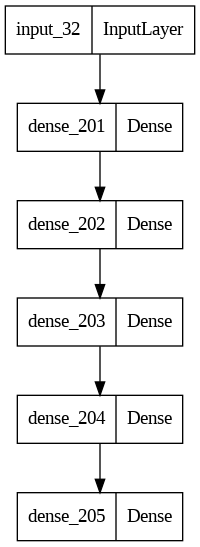

In [719]:
plot_model(model1)

Model compilation

In [720]:
model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [721]:
history1 = model1.fit(X_train, y_train, epochs=20, batch_size=5, validation_data=(X_val, y_val))

Epoch 1/20
49/49 [==============================] - 1s 7ms/step - loss: 0.1722 - accuracy: 0.8140 - val_loss: 0.0746 - val_accuracy: 0.8571
Epoch 2/20
49/49 [==============================] - 0s 3ms/step - loss: 0.0619 - accuracy: 0.9298 - val_loss: 0.0154 - val_accuracy: 1.0000
Epoch 3/20
49/49 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.9793 - val_loss: 0.0146 - val_accuracy: 1.0000
Epoch 4/20
49/49 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 0.9917 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 5/20
49/49 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 6/20
49/49 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 7/20
49/49 [==============================] - 0s 3ms/step - loss: 4.5822e-04 - accuracy: 1.0000 - val_loss: 8.0616e-04 - val_accuracy: 1.0000
Epoch 8/20
4

Calculating test loss and accuracy

In [722]:
loss, accuracy = model1.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

2/2 [==============================] - 0s 7ms/step - loss: 1.7543e-04 - accuracy: 1.0000
Test loss: 0.00017542844580020756
Test accuracy: 1.0


In [723]:
def plot_function(history):
  fig, ax = plt.subplots(1, 2, figsize=(25, 8))

  ax[0].plot(history.history['loss'], color='red', label='train_loss')
  ax[0].plot(history.history['val_loss'], color='green', label='val_loss')
  ax[0].set_title('Loss and val_loss')
  ax[0].legend()

  ax[1].plot(history.history['accuracy'], color='orange', label='train_accuracy')
  ax[1].plot(history.history['val_accuracy'], color='black', label='val_accuracy')
  ax[1].set_title('Accuracy and val_accuracy')
  ax[1].legend()

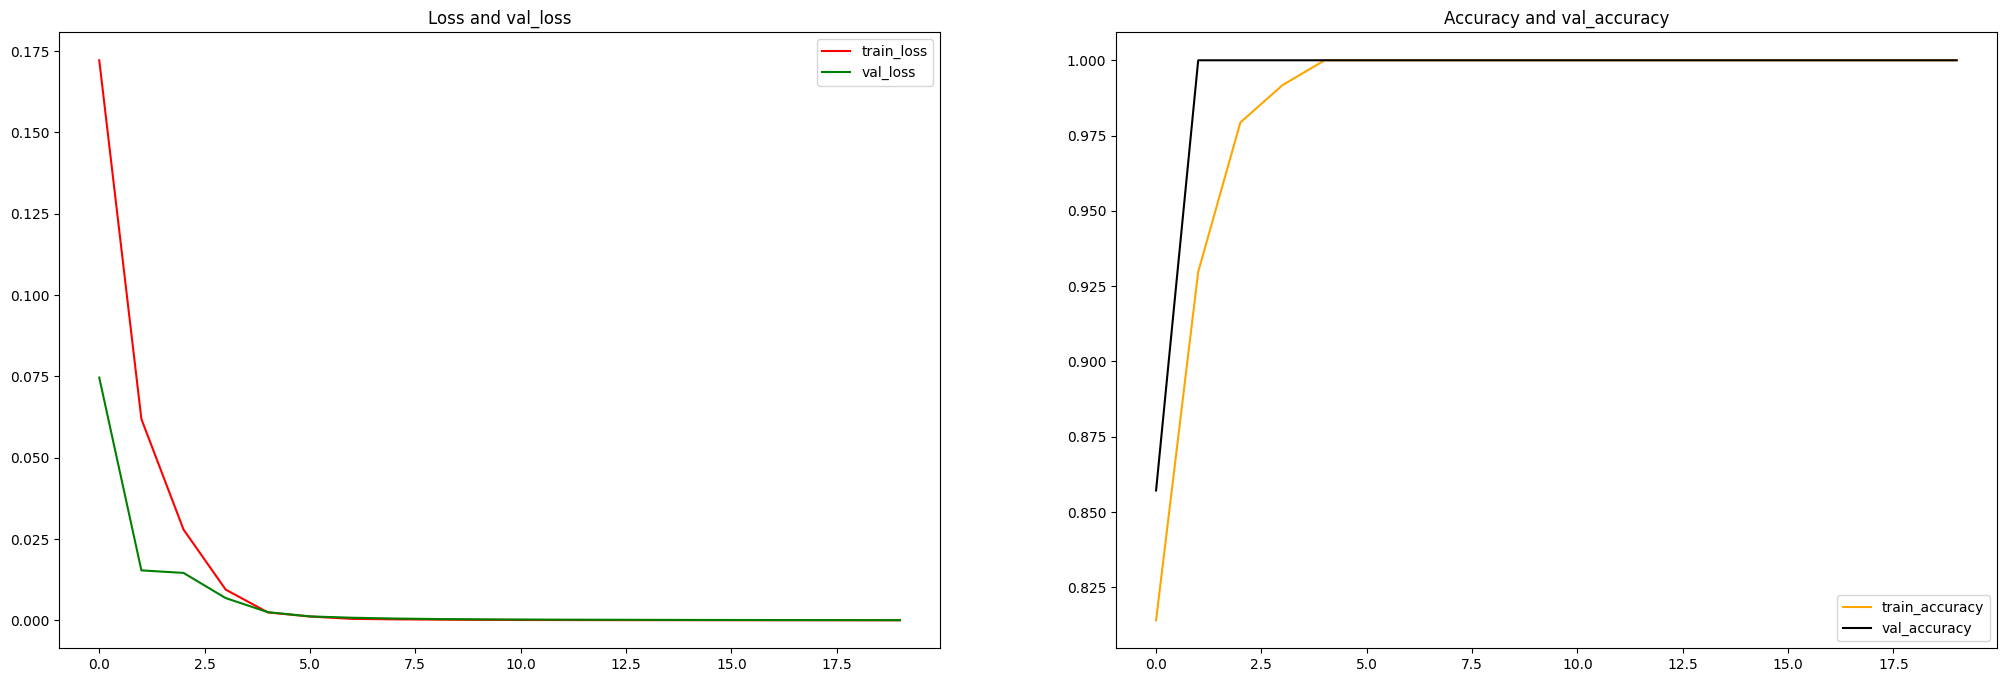

In [724]:
plot_function(history1)

####Model 2

In [725]:
inputs = Input(shape = (13))
x = Dense(64,activation = 'relu')(inputs)
x = Dense(128,activation = 'relu')(x)
x = Dense(64,activation = 'relu')(x)
x = Dense(32,activation = 'relu')(x)
outputs = Dense(1,activation = 'sigmoid')(x)
model2 = Model(inputs,outputs)
print(model2.summary())

Model: "model_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_33 (InputLayer)       [(None, 13)]              0         
                                                                 
 dense_206 (Dense)           (None, 64)                896       
                                                                 
 dense_207 (Dense)           (None, 128)               8320      
                                                                 
 dense_208 (Dense)           (None, 64)                8256      
                                                                 
 dense_209 (Dense)           (None, 32)                2080      
                                                                 
 dense_210 (Dense)           (None, 1)                 33        
                                                                 
Total params: 19,585
Trainable params: 19,585
Non-trainabl

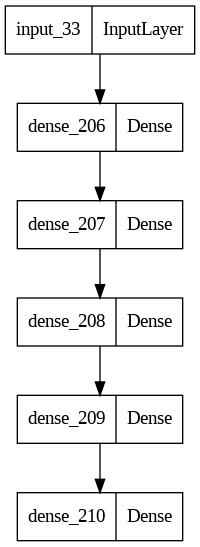

In [726]:
plot_model(model2)

Model compilation

In [727]:
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [728]:
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
8/8 [==============================] - 1s 31ms/step - loss: 0.2076 - accuracy: 0.7479 - val_loss: 0.1421 - val_accuracy: 1.0000
Epoch 2/50
8/8 [==============================] - 0s 7ms/step - loss: 0.1520 - accuracy: 0.8512 - val_loss: 0.0813 - val_accuracy: 1.0000
Epoch 3/50
8/8 [==============================] - 0s 8ms/step - loss: 0.1172 - accuracy: 0.8512 - val_loss: 0.0538 - val_accuracy: 1.0000
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 0.0925 - accuracy: 0.8843 - val_loss: 0.0441 - val_accuracy: 1.0000
Epoch 5/50
8/8 [==============================] - 0s 7ms/step - loss: 0.0698 - accuracy: 0.9091 - val_loss: 0.0404 - val_accuracy: 1.0000
Epoch 6/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0477 - accuracy: 0.9545 - val_loss: 0.0443 - val_accuracy: 1.0000
Epoch 7/50
8/8 [==============================] - 0s 7ms/step - loss: 0.0295 - accuracy: 0.9711 - val_loss: 0.0371 - val_accuracy: 1.0000
Epoch 8/50
8/8 [================

Calculating test loss and accuracy

In [729]:
loss, accuracy = model2.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

2/2 [==============================] - 0s 9ms/step - loss: 0.0052 - accuracy: 1.0000
Test loss: 0.00516891572624445
Test accuracy: 1.0


In [730]:
def plot_function(history):
  fig, ax = plt.subplots(1, 2, figsize=(25, 8))

  ax[0].plot(history.history['loss'], color='red', label='train_loss')
  ax[0].plot(history.history['val_loss'], color='green', label='val_loss')
  ax[0].set_title('Loss and val_loss')
  ax[0].legend()

  ax[1].plot(history.history['accuracy'], color='orange', label='train_accuracy')
  ax[1].plot(history.history['val_accuracy'], color='black', label='val_accuracy')
  ax[1].set_title('Accuracy and val_accuracy')
  ax[1].legend()

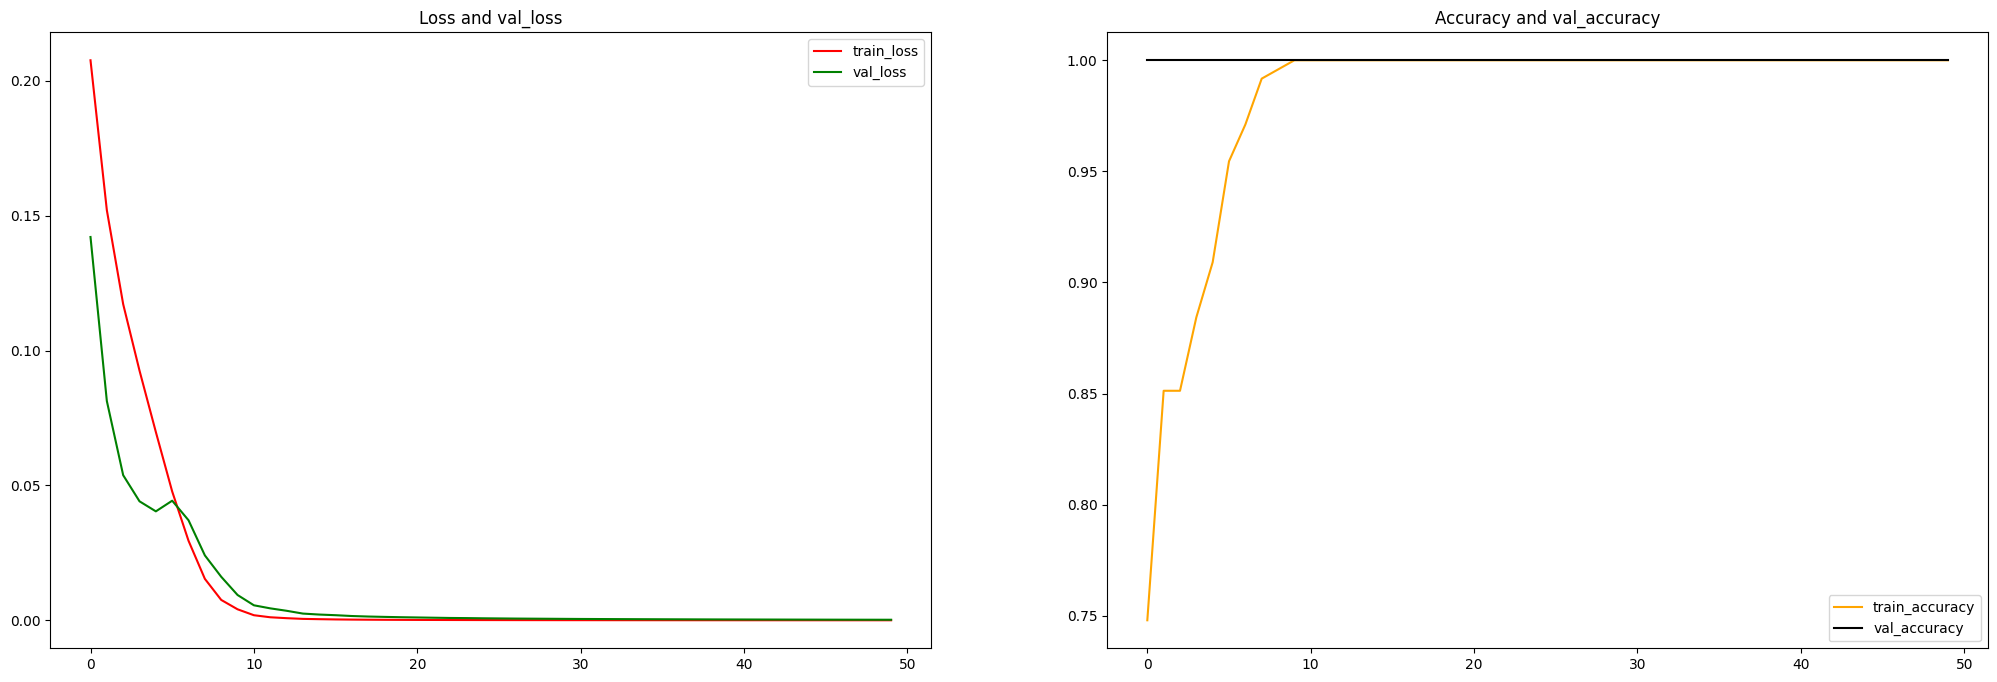

In [731]:
plot_function(history2)

####Model 3

In [732]:
inputs = Input(shape = (13))
x = Dense(64,activation = 'relu')(inputs)
x = Dense(64,activation = 'relu')(x)
x = Dense(32,activation = 'relu')(x)
outputs = Dense(1,activation = 'sigmoid')(x)
model3 = Model(inputs,outputs)
print(model3.summary())

Model: "model_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_34 (InputLayer)       [(None, 13)]              0         
                                                                 
 dense_211 (Dense)           (None, 64)                896       
                                                                 
 dense_212 (Dense)           (None, 64)                4160      
                                                                 
 dense_213 (Dense)           (None, 32)                2080      
                                                                 
 dense_214 (Dense)           (None, 1)                 33        
                                                                 
Total params: 7,169
Trainable params: 7,169
Non-trainable params: 0
_________________________________________________________________
None


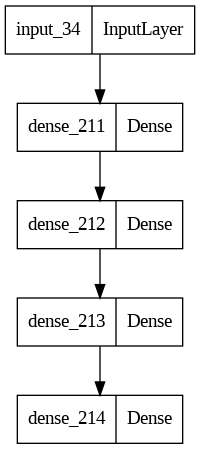

In [733]:
plot_model(model3)

Model compilation

In [734]:
model3.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [735]:
history3 = model3.fit(X_train, y_train, epochs=100, batch_size=40, validation_data=(X_val, y_val))

Epoch 1/100
7/7 [==============================] - 1s 39ms/step - loss: 0.2176 - accuracy: 0.6364 - val_loss: 0.1779 - val_accuracy: 0.8571
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 0.1649 - accuracy: 0.8595 - val_loss: 0.1341 - val_accuracy: 0.8571
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 0.1295 - accuracy: 0.8926 - val_loss: 0.1133 - val_accuracy: 0.8571
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 0.1046 - accuracy: 0.9132 - val_loss: 0.0964 - val_accuracy: 0.8571
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0861 - accuracy: 0.9132 - val_loss: 0.0794 - val_accuracy: 0.8571
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0767 - accuracy: 0.9132 - val_loss: 0.0678 - val_accuracy: 0.8571
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0655 - accuracy: 0.9215 - val_loss: 0.0567 - val_accuracy: 1.0000
Epoch 8/100
7/7 [=======

Calculating test loss and accuracy

In [736]:
loss, accuracy = model3.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - accuracy: 1.0000
Test loss: 0.0011031905887648463
Test accuracy: 1.0


In [737]:
def plot_function(history):
  fig, ax = plt.subplots(1, 2, figsize=(25, 8))

  ax[0].plot(history.history['loss'], color='red', label='train_loss')
  ax[0].plot(history.history['val_loss'], color='green', label='val_loss')
  ax[0].set_title('Loss and val_loss')
  ax[0].legend()

  ax[1].plot(history.history['accuracy'], color='orange', label='train_accuracy')
  ax[1].plot(history.history['val_accuracy'], color='black', label='val_accuracy')
  ax[1].set_title('Accuracy and val_accuracy')
  ax[1].legend()

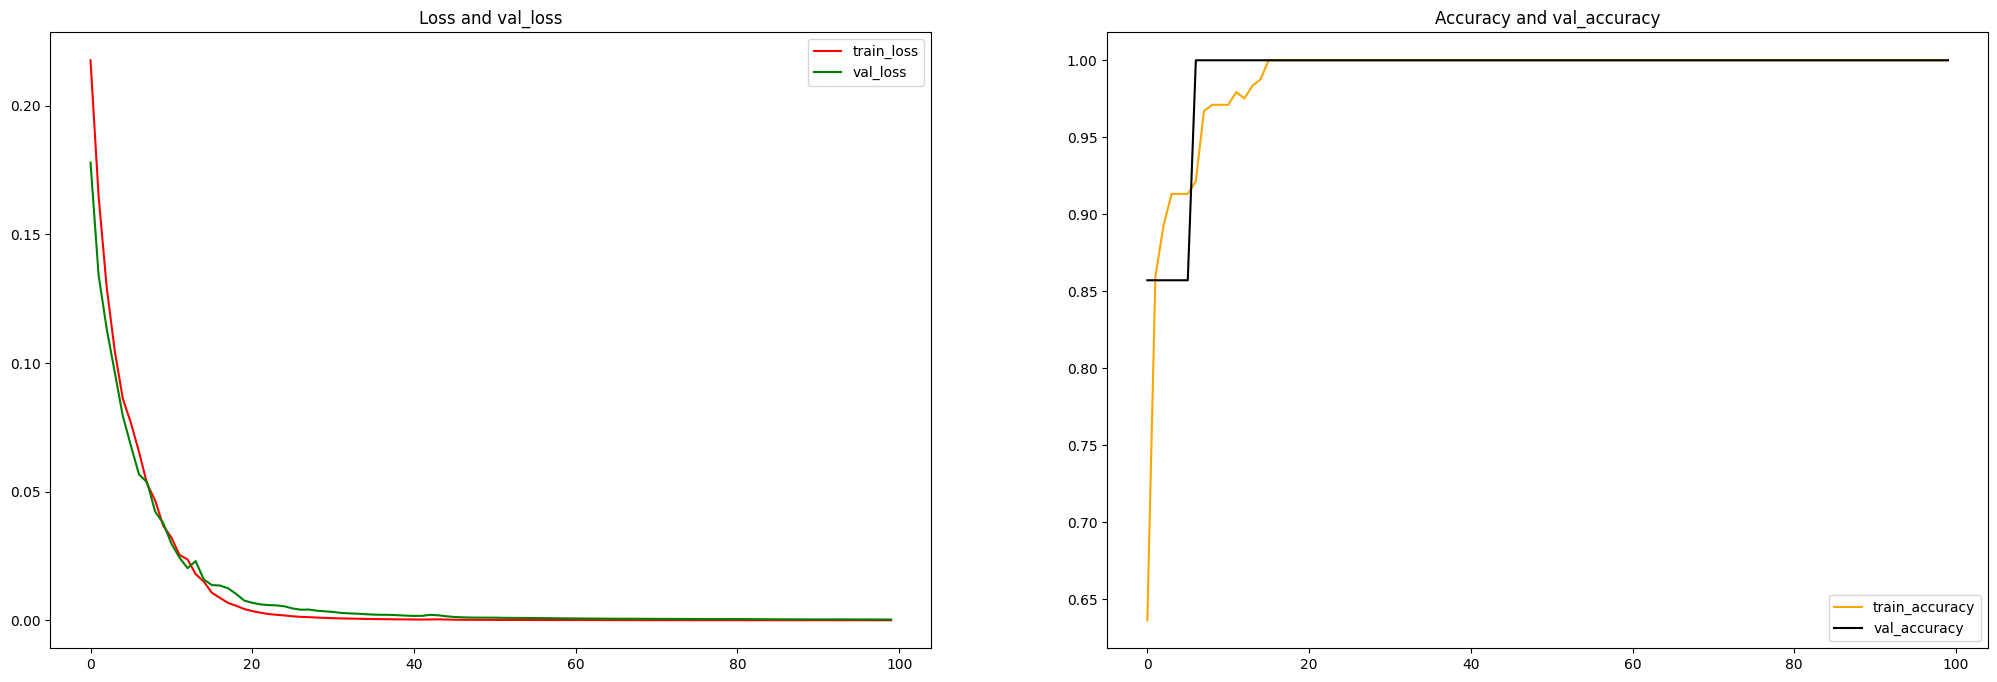

In [738]:
plot_function(history3)

Conclusion: Functional API performs slightly better than Sequential Method having lesser test loss. Test accuracy is same for both the models.

####Model 4

In [739]:
inputs = Input(shape = (13))
x = Dense(64,activation = 'relu')(inputs)
x = Dense(128,activation = 'relu')(x)
x = Dense(64,activation = 'relu')(x)
x = Dense(32,activation = 'relu')(x)
outputs = Dense(1,activation = 'sigmoid')(x)
model4 = Model(inputs,outputs)
print(model4.summary())

Model: "model_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_35 (InputLayer)       [(None, 13)]              0         
                                                                 
 dense_215 (Dense)           (None, 64)                896       
                                                                 
 dense_216 (Dense)           (None, 128)               8320      
                                                                 
 dense_217 (Dense)           (None, 64)                8256      
                                                                 
 dense_218 (Dense)           (None, 32)                2080      
                                                                 
 dense_219 (Dense)           (None, 1)                 33        
                                                                 
Total params: 19,585
Trainable params: 19,585
Non-trainabl

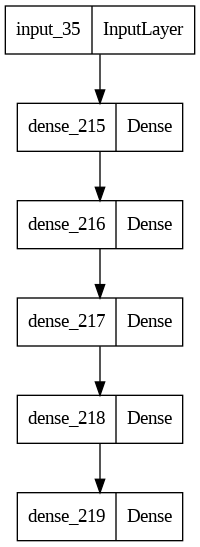

In [740]:
plot_model(model4)

Model compilation

In [741]:
model4.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [742]:
history4 = model4.fit(X_train, y_train, epochs=100, batch_size=40, validation_data=(X_val, y_val))

Epoch 1/100
7/7 [==============================] - 2s 37ms/step - loss: 0.2468 - accuracy: 0.4917 - val_loss: 0.1994 - val_accuracy: 0.8571
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 0.2043 - accuracy: 0.8636 - val_loss: 0.1452 - val_accuracy: 1.0000
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 0.1639 - accuracy: 0.8884 - val_loss: 0.1067 - val_accuracy: 1.0000
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 0.1309 - accuracy: 0.9008 - val_loss: 0.0771 - val_accuracy: 1.0000
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0986 - accuracy: 0.9215 - val_loss: 0.0586 - val_accuracy: 1.0000
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0746 - accuracy: 0.9298 - val_loss: 0.0535 - val_accuracy: 1.0000
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0552 - accuracy: 0.9380 - val_loss: 0.0414 - val_accuracy: 1.0000
Epoch 8/100
7/7 [========

Calculating test loss and accuracy

In [743]:
loss, accuracy = model4.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

2/2 [==============================] - 0s 10ms/step - loss: 3.9478e-04 - accuracy: 1.0000
Test loss: 0.00039478045073337853
Test accuracy: 1.0


In [744]:
def plot_function(history):
  fig, ax = plt.subplots(1, 2, figsize=(25, 8))

  ax[0].plot(history.history['loss'], color='red', label='train_loss')
  ax[0].plot(history.history['val_loss'], color='green', label='val_loss')
  ax[0].set_title('Loss and val_loss')
  ax[0].legend()

  ax[1].plot(history.history['accuracy'], color='orange', label='train_accuracy')
  ax[1].plot(history.history['val_accuracy'], color='black', label='val_accuracy')
  ax[1].set_title('Accuracy and val_accuracy')
  ax[1].legend()

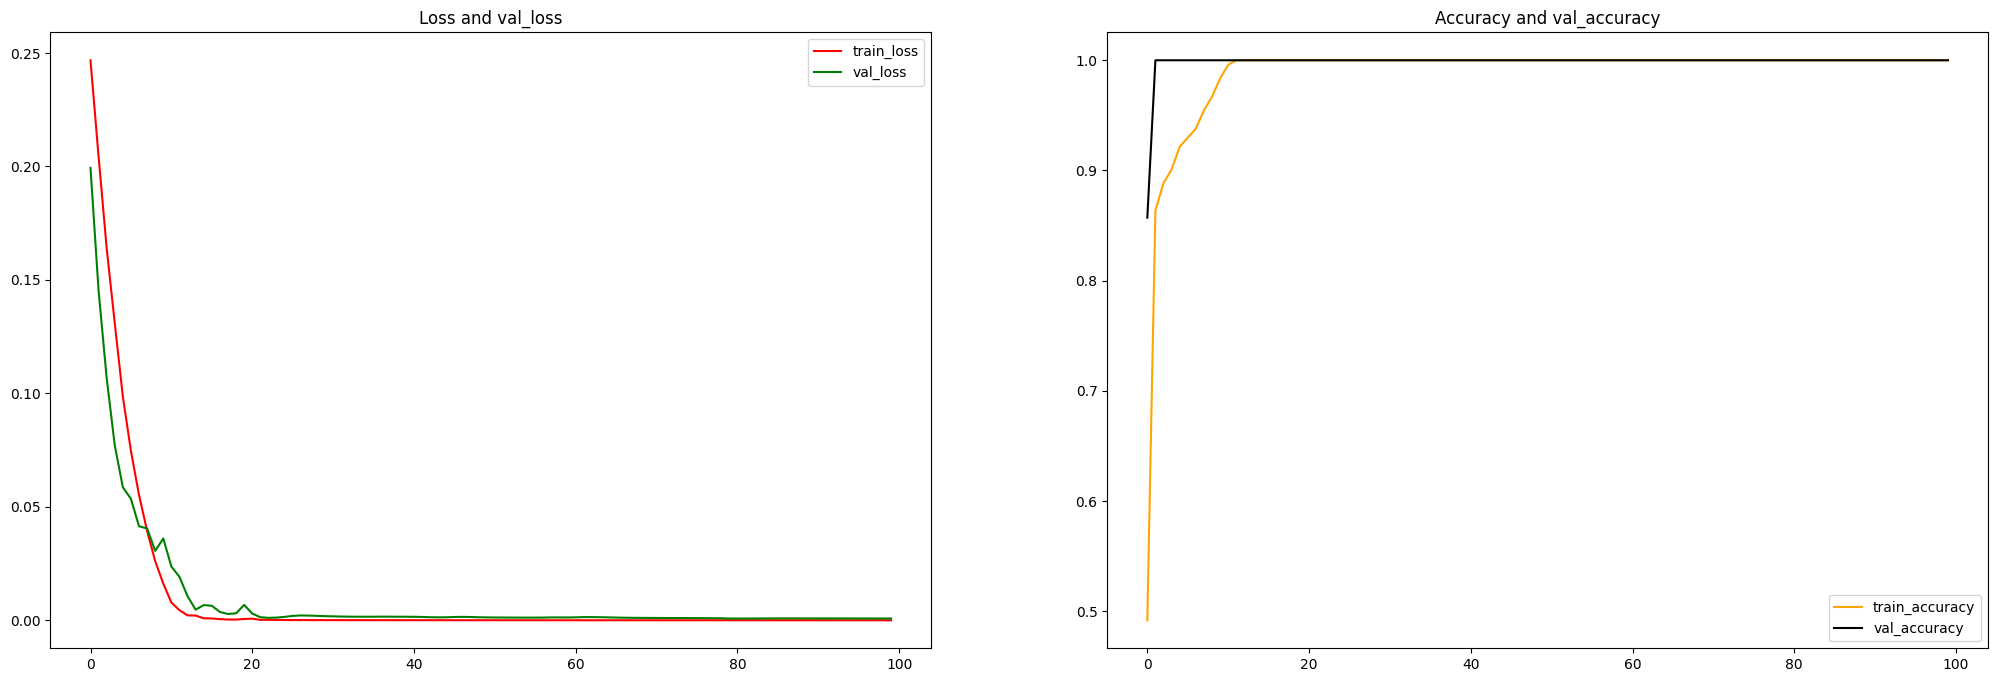

In [745]:
plot_function(history4)

Conclusion: Model 1 performs the best in terms of loss, having least hidden layers, number of epochs and batch size. Accuracy is same for all the models.

##Regression: House Price Prediction Dataset

Loading Dataset

In [746]:
hpp_data = pd.read_csv('/content/HousePricePrediction.csv')

In [747]:
hpp_data.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Target variable: SalePrice

In [748]:
hpp_data = hpp_data.drop('Id', axis=1)

Checking for null values

In [749]:
hpp_data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

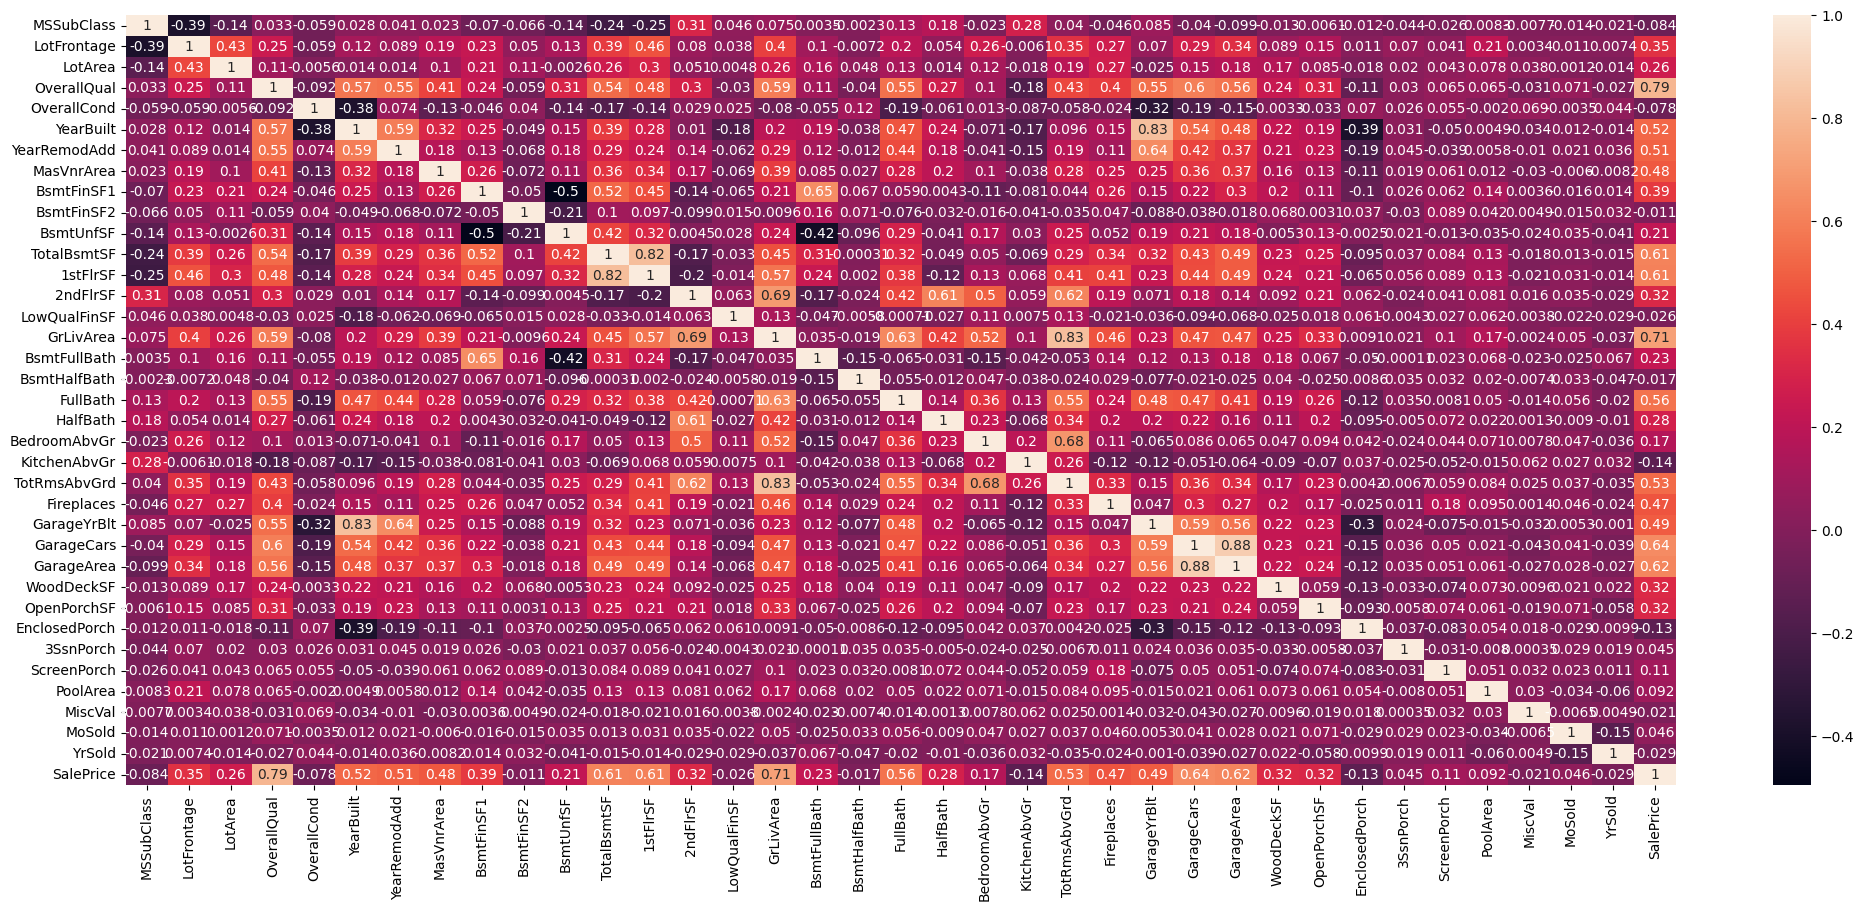

In [750]:
plt.figure(figsize = (25,10))
sb.heatmap(hpp_data.corr(),annot = True);

Top 4 features having positive correlation with SalePrice:
1. OverallQual - 0.79
2. GrLivArea - 0.71
3. GarrageCars - 0.64
4. TotalBsmtSF - 0.61

Since GarrageCars and GarrageArea have high correlation but both are highly correlated with each other, we might consider only one of the two features (GarrageCars, since it has higher correlation value compared to GarrageCars) and go for TotalMsmtSF as the next highly correlated feature

In [751]:
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
hpp_data = hpp_data[selected_features + ['SalePrice']]
hpp_data.head(10)

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,SalePrice
0,7,1710,2,856,208500
1,6,1262,2,1262,181500
2,7,1786,2,920,223500
3,7,1717,3,756,140000
4,8,2198,3,1145,250000
5,5,1362,2,796,143000
6,8,1694,2,1686,307000
7,7,2090,2,1107,200000
8,7,1774,2,952,129900
9,5,1077,1,991,118000


In [752]:
hpp_data.isnull().sum()

OverallQual    0
GrLivArea      0
GarageCars     0
TotalBsmtSF    0
SalePrice      0
dtype: int64

Since there are no null values in the final dataset, no need to replace/fill anything.

In [753]:
print(hpp_data.describe())

       OverallQual    GrLivArea   GarageCars  TotalBsmtSF      SalePrice
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000
mean      6.099315  1515.463699     1.767123  1057.429452  180921.195890
std       1.382997   525.480383     0.747315   438.705324   79442.502883
min       1.000000   334.000000     0.000000     0.000000   34900.000000
25%       5.000000  1129.500000     1.000000   795.750000  129975.000000
50%       6.000000  1464.000000     2.000000   991.500000  163000.000000
75%       7.000000  1776.750000     2.000000  1298.250000  214000.000000
max      10.000000  5642.000000     4.000000  6110.000000  755000.000000


In [754]:
print(hpp_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OverallQual  1460 non-null   int64
 1   GrLivArea    1460 non-null   int64
 2   GarageCars   1460 non-null   int64
 3   TotalBsmtSF  1460 non-null   int64
 4   SalePrice    1460 non-null   int64
dtypes: int64(5)
memory usage: 57.2 KB
None


Since there are no categorical features, no feature transformation is required

In [755]:
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'SalePrice']

for i in features:
    sc = StandardScaler()
    hpp_data[i] = sc.fit_transform(hpp_data[i].values.reshape(-1, 1))

In [756]:
hpp_data.head(10)

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,SalePrice
0,0.651479,0.370333,0.311725,-0.459303,0.347273
1,-0.071836,-0.482512,0.311725,0.466465,0.007288
2,0.651479,0.515013,0.311725,-0.313369,0.536154
3,0.651479,0.383659,1.650307,-0.687324,-0.515281
4,1.374795,1.299326,1.650307,0.199680,0.869843
5,-0.795151,-0.292145,0.311725,-0.596115,-0.477505
6,1.374795,0.339875,0.311725,1.433276,1.587588
7,0.651479,1.093729,0.311725,0.113032,0.240241
8,0.651479,0.492168,0.311725,-0.240402,-0.642461
9,-0.795151,-0.834691,-1.026858,-0.151473,-0.792306


In [757]:
X = hpp_data.iloc[:,1:]
y = hpp_data['SalePrice']

print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (1460, 4)
y shape: (1460,)


Splitting the dataset into train, validation and test sets

In [758]:
X_train, X_part, y_train, y_part = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_test, X_val, y_test, y_val = train_test_split(X_part, y_part, test_size = 0.1, random_state = 42)

print('X train shape:', X_train.shape)
print('X validation shape:', X_val.shape)
print('X test shape:', X_test.shape)
print('y train shape:', y_train.shape)
print('y validation shape:', y_val.shape)
print('y test shape:', y_test.shape)

X train shape: (1168, 4)
X validation shape: (30, 4)
X test shape: (262, 4)
y train shape: (1168,)
y validation shape: (30,)
y test shape: (262,)


###Method 1: Sequential Method

####Model 1

In [759]:
model1 = Sequential()
model1.add(Dense(1, input_shape=(4,)))

In [760]:
print(model1.summary())

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_220 (Dense)           (None, 1)                 5         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
None


In [761]:
model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

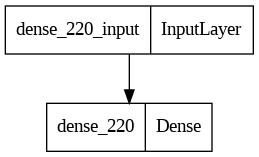

In [762]:
plot_model(model1)

In [763]:
history1 = model1.fit(X_train, y_train, epochs=30, batch_size=10, validation_data=(X_val, y_val))

Epoch 1/30
117/117 [==============================] - 1s 3ms/step - loss: 2.3768 - mean_absolute_error: 1.1592 - mean_squared_error: 2.3768 - val_loss: 1.8919 - val_mean_absolute_error: 1.1191 - val_mean_squared_error: 1.8919
Epoch 2/30
117/117 [==============================] - 0s 2ms/step - loss: 1.8951 - mean_absolute_error: 1.0382 - mean_squared_error: 1.8951 - val_loss: 1.5061 - val_mean_absolute_error: 1.0115 - val_mean_squared_error: 1.5061
Epoch 3/30
117/117 [==============================] - 0s 2ms/step - loss: 1.5439 - mean_absolute_error: 0.9371 - mean_squared_error: 1.5439 - val_loss: 1.2103 - val_mean_absolute_error: 0.9121 - val_mean_squared_error: 1.2103
Epoch 4/30
117/117 [==============================] - 0s 2ms/step - loss: 1.2805 - mean_absolute_error: 0.8481 - mean_squared_error: 1.2805 - val_loss: 0.9933 - val_mean_absolute_error: 0.8255 - val_mean_squared_error: 0.9933
Epoch 5/30
117/117 [==============================] - 0s 2ms/step - loss: 1.0814 - mean_absolute

In [764]:
loss, mean_absolute_error, mean_squared_error = model1.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Mean Absolute Error:", mean_absolute_error)
print("Mean Squared Error:", mean_squared_error)

9/9 [==============================] - 0s 2ms/step - loss: 0.0347 - mean_absolute_error: 0.1329 - mean_squared_error: 0.0347
Test loss: 0.034662455320358276
Mean Absolute Error: 0.13292767107486725
Mean Squared Error: 0.034662455320358276


In [765]:
def plot_function(history):
  fig, ax = plt.subplots(1, 2, figsize=(25, 8))

  ax[0].plot(history.history['loss'], color='red', label='train_loss')
  ax[0].plot(history.history['val_loss'], color='green', label='val_loss')
  ax[0].set_title('Loss and val_loss')
  ax[0].legend()

  ax[1].plot(history.history['mean_absolute_error'], color='orange', label='train_mean_absolute_error')
  ax[1].plot(history.history['val_mean_absolute_error'], color='blue', label='val_mean_absolute_error')
  ax[1].set_title('Mean Absolute Error and val_mean_absolute_error')
  ax[1].legend()

  plt.show()

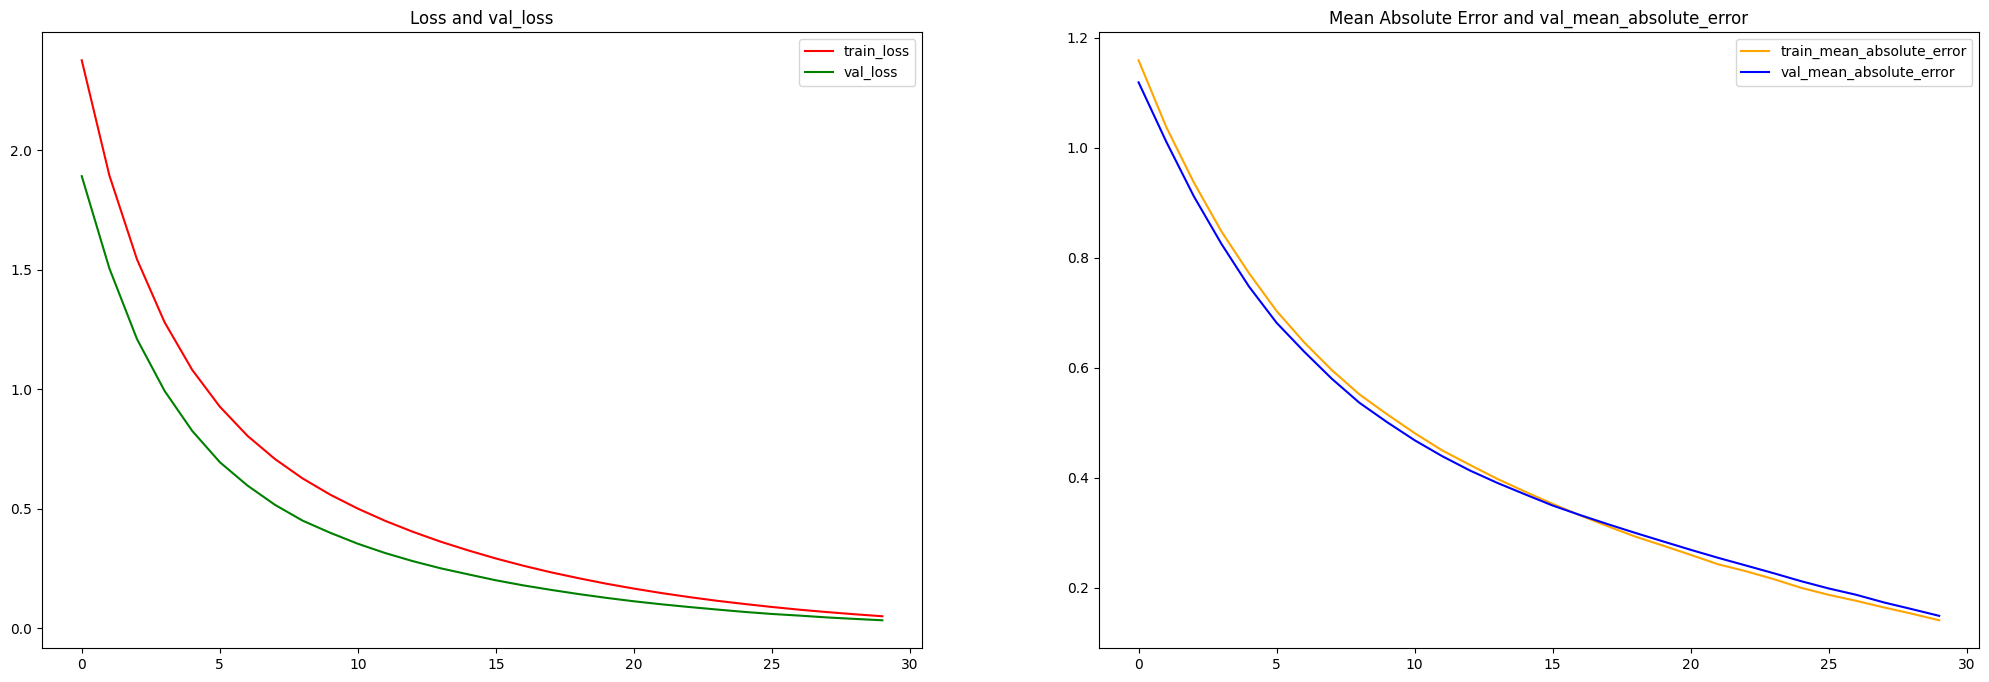

In [766]:
plot_function(history1)

####Model 2

In [783]:
model2 = Sequential()
model2.add(Dense(1, input_shape=(4,)))

In [784]:
print(model2.summary())

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_223 (Dense)           (None, 1)                 5         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
None


In [785]:
model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

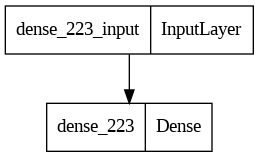

In [786]:
plot_model(model2)

In [787]:
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=20, validation_data=(X_val, y_val))

Epoch 1/50
59/59 [==============================] - 1s 5ms/step - loss: 1.2988 - mean_absolute_error: 0.8622 - mean_squared_error: 1.2988 - val_loss: 0.8780 - val_mean_absolute_error: 0.7382 - val_mean_squared_error: 0.8780
Epoch 2/50
59/59 [==============================] - 0s 2ms/step - loss: 1.0171 - mean_absolute_error: 0.7608 - mean_squared_error: 1.0171 - val_loss: 0.6843 - val_mean_absolute_error: 0.6557 - val_mean_squared_error: 0.6843
Epoch 3/50
59/59 [==============================] - 0s 2ms/step - loss: 0.7972 - mean_absolute_error: 0.6694 - mean_squared_error: 0.7972 - val_loss: 0.5344 - val_mean_absolute_error: 0.5842 - val_mean_squared_error: 0.5344
Epoch 4/50
59/59 [==============================] - 0s 2ms/step - loss: 0.6269 - mean_absolute_error: 0.5890 - mean_squared_error: 0.6269 - val_loss: 0.4234 - val_mean_absolute_error: 0.5210 - val_mean_squared_error: 0.4234
Epoch 5/50
59/59 [==============================] - 0s 2ms/step - loss: 0.4992 - mean_absolute_error: 0.

In [788]:
loss, mean_absolute_error, mean_squared_error = model2.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Mean Absolute Error:", mean_absolute_error)
print("Mean Squared Error:", mean_squared_error)

9/9 [==============================] - 0s 3ms/step - loss: 0.0017 - mean_absolute_error: 0.0304 - mean_squared_error: 0.0017
Test loss: 0.0017160295974463224
Mean Absolute Error: 0.030441010370850563
Mean Squared Error: 0.0017160295974463224


In [789]:
def plot_function(history):
  fig, ax = plt.subplots(1, 2, figsize=(25, 8))

  ax[0].plot(history.history['loss'], color='red', label='train_loss')
  ax[0].plot(history.history['val_loss'], color='green', label='val_loss')
  ax[0].set_title('Loss and val_loss')
  ax[0].legend()

  ax[1].plot(history.history['mean_absolute_error'], color='orange', label='train_mean_absolute_error')
  ax[1].plot(history.history['val_mean_absolute_error'], color='blue', label='val_mean_absolute_error')
  ax[1].set_title('Mean Absolute Error and val_mean_absolute_error')
  ax[1].legend()

  plt.show()

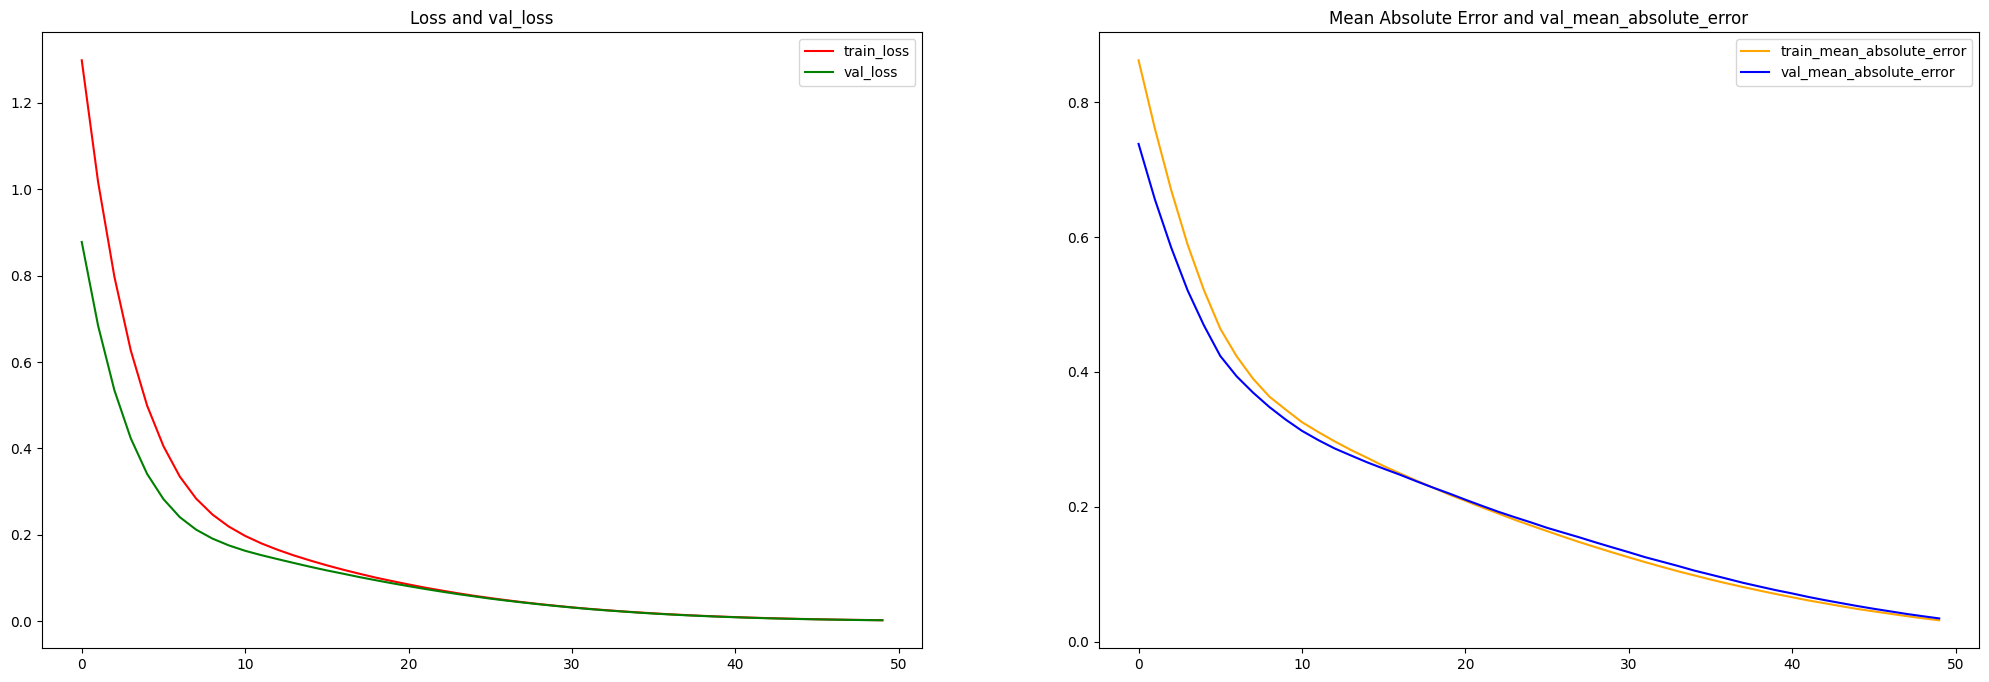

In [790]:
plot_function(history2)

####Model 3

In [775]:
model3 = Sequential()
model3.add(Dense(1, input_shape=(4,)))

In [776]:
print(model3.summary())

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_222 (Dense)           (None, 1)                 5         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
None


In [777]:
model3.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

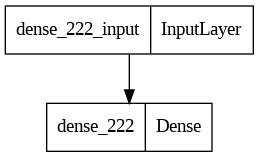

In [778]:
plot_model(model3)

In [779]:
history3 = model3.fit(X_train, y_train, epochs=100, batch_size=50, validation_data=(X_val, y_val))

Epoch 1/100
24/24 [==============================] - 1s 10ms/step - loss: 1.3659 - mean_absolute_error: 0.9658 - mean_squared_error: 1.3659 - val_loss: 0.9858 - val_mean_absolute_error: 0.8865 - val_mean_squared_error: 0.9858
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 1.3027 - mean_absolute_error: 0.9439 - mean_squared_error: 1.3027 - val_loss: 0.9416 - val_mean_absolute_error: 0.8665 - val_mean_squared_error: 0.9416
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 1.2415 - mean_absolute_error: 0.9222 - mean_squared_error: 1.2415 - val_loss: 0.8996 - val_mean_absolute_error: 0.8472 - val_mean_squared_error: 0.8996
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 1.1838 - mean_absolute_error: 0.9013 - mean_squared_error: 1.1838 - val_loss: 0.8589 - val_mean_absolute_error: 0.8278 - val_mean_squared_error: 0.8589
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 1.1270 - mean_absolute_err

In [780]:
loss, mean_absolute_error, mean_squared_error = model3.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Mean Absolute Error:", mean_absolute_error)
print("Mean Squared Error:", mean_squared_error)

9/9 [==============================] - 0s 3ms/step - loss: 2.8264e-04 - mean_absolute_error: 0.0133 - mean_squared_error: 2.8264e-04
Test loss: 0.0002826352429110557
Mean Absolute Error: 0.013282902538776398
Mean Squared Error: 0.0002826352429110557


In [781]:
def plot_function(history):
  fig, ax = plt.subplots(1, 2, figsize=(25, 8))

  ax[0].plot(history.history['loss'], color='red', label='train_loss')
  ax[0].plot(history.history['val_loss'], color='green', label='val_loss')
  ax[0].set_title('Loss and val_loss')
  ax[0].legend()

  ax[1].plot(history.history['mean_absolute_error'], color='orange', label='train_mean_absolute_error')
  ax[1].plot(history.history['val_mean_absolute_error'], color='blue', label='val_mean_absolute_error')
  ax[1].set_title('Mean Absolute Error and val_mean_absolute_error')
  ax[1].legend()

  plt.show()

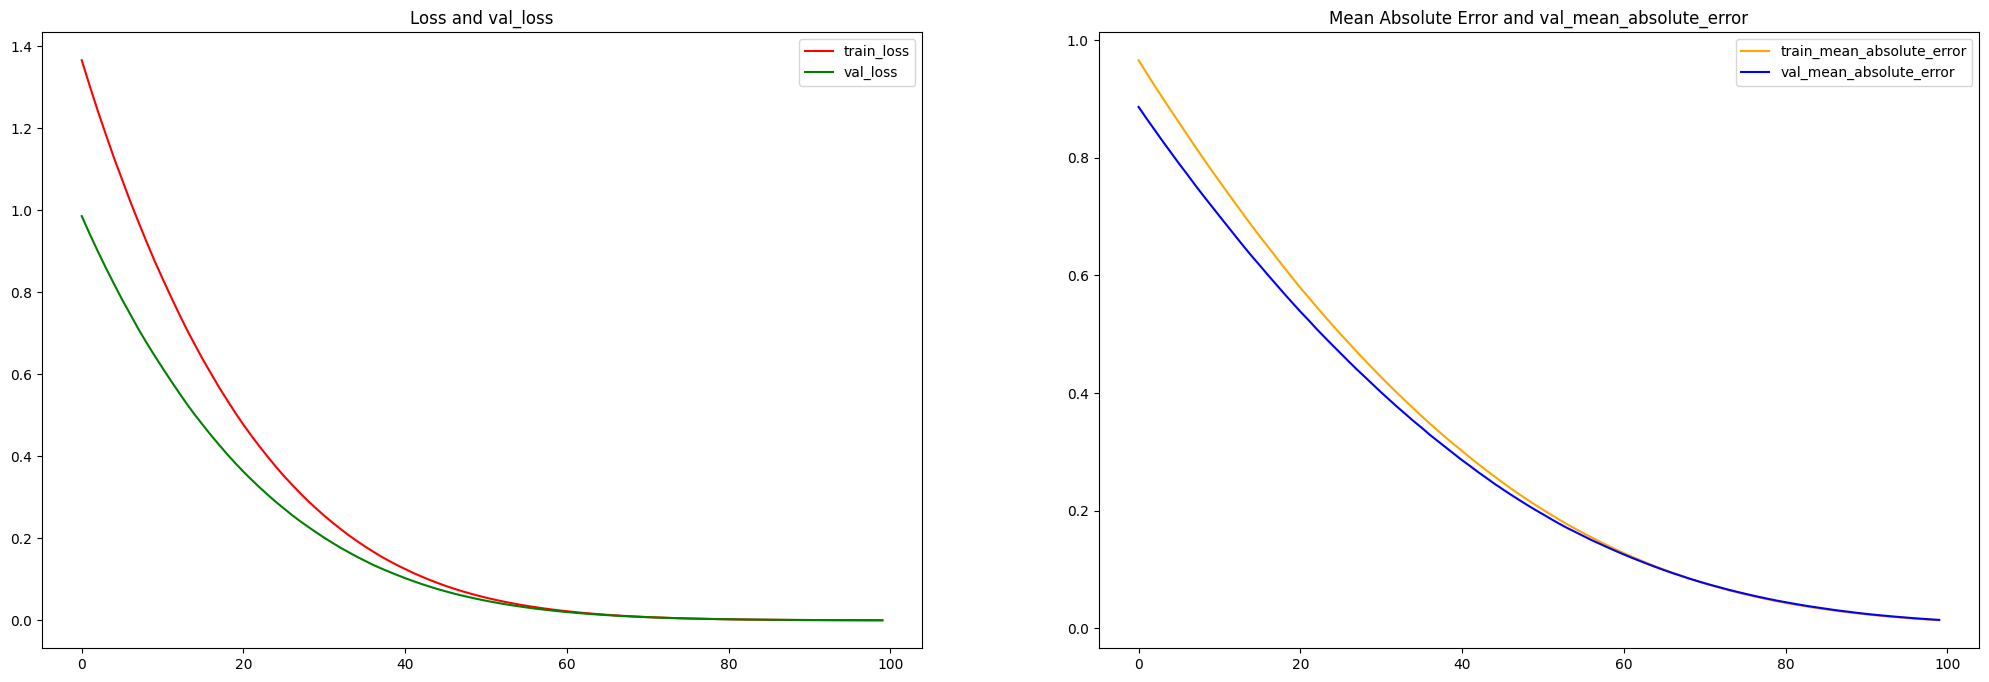

In [782]:
plot_function(history3)

Conclusion: Model 3 performs the best amongst the three models, indicating that more number of epochs and batch size results in the least loss and errors.

###Method 2: Functional API

####Model 1

In [855]:
inputs = Input(shape=(4,))
outputs = Dense(1)(inputs)
model1 = Model(inputs, outputs)

In [856]:
print(model1.summary())

Model: "model_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_45 (InputLayer)       [(None, 4)]               0         
                                                                 
 dense_233 (Dense)           (None, 1)                 5         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
None


In [857]:
model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

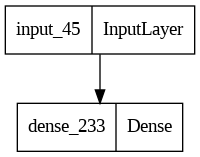

In [858]:
plot_model(model1)

In [859]:
history1 = model1.fit(X_train, y_train, epochs=20, batch_size=10, validation_data=(X_val, y_val))

Epoch 1/20
117/117 [==============================] - 1s 3ms/step - loss: 1.8826 - mean_absolute_error: 1.0241 - mean_squared_error: 1.8826 - val_loss: 1.7594 - val_mean_absolute_error: 1.0134 - val_mean_squared_error: 1.7594
Epoch 2/20
117/117 [==============================] - 0s 2ms/step - loss: 1.4298 - mean_absolute_error: 0.8860 - mean_squared_error: 1.4298 - val_loss: 1.3878 - val_mean_absolute_error: 0.8829 - val_mean_squared_error: 1.3878
Epoch 3/20
117/117 [==============================] - 0s 2ms/step - loss: 1.1326 - mean_absolute_error: 0.7843 - mean_squared_error: 1.1326 - val_loss: 1.1223 - val_mean_absolute_error: 0.7819 - val_mean_squared_error: 1.1223
Epoch 4/20
117/117 [==============================] - 0s 2ms/step - loss: 0.9197 - mean_absolute_error: 0.7018 - mean_squared_error: 0.9197 - val_loss: 0.9240 - val_mean_absolute_error: 0.7097 - val_mean_squared_error: 0.9240
Epoch 5/20
117/117 [==============================] - 0s 2ms/step - loss: 0.7622 - mean_absolute

In [860]:
loss, mean_absolute_error, mean_squared_error = model1.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Mean Absolute Error:", mean_absolute_error)
print("Mean Squared Error:", mean_squared_error)

9/9 [==============================] - 0s 3ms/step - loss: 0.0706 - mean_absolute_error: 0.1957 - mean_squared_error: 0.0706
Test loss: 0.07062600553035736
Mean Absolute Error: 0.1956629455089569
Mean Squared Error: 0.07062600553035736


In [861]:
def plot_function(history):
  fig, ax = plt.subplots(1, 2, figsize=(25, 8))

  ax[0].plot(history.history['loss'], color='red', label='train_loss')
  ax[0].plot(history.history['val_loss'], color='green', label='val_loss')
  ax[0].set_title('Loss and val_loss')
  ax[0].legend()

  ax[1].plot(history.history['mean_absolute_error'], color='orange', label='train_mean_absolute_error')
  ax[1].plot(history.history['val_mean_absolute_error'], color='blue', label='val_mean_absolute_error')
  ax[1].set_title('Mean Absolute Error and val_mean_absolute_error')
  ax[1].legend()

  plt.show()

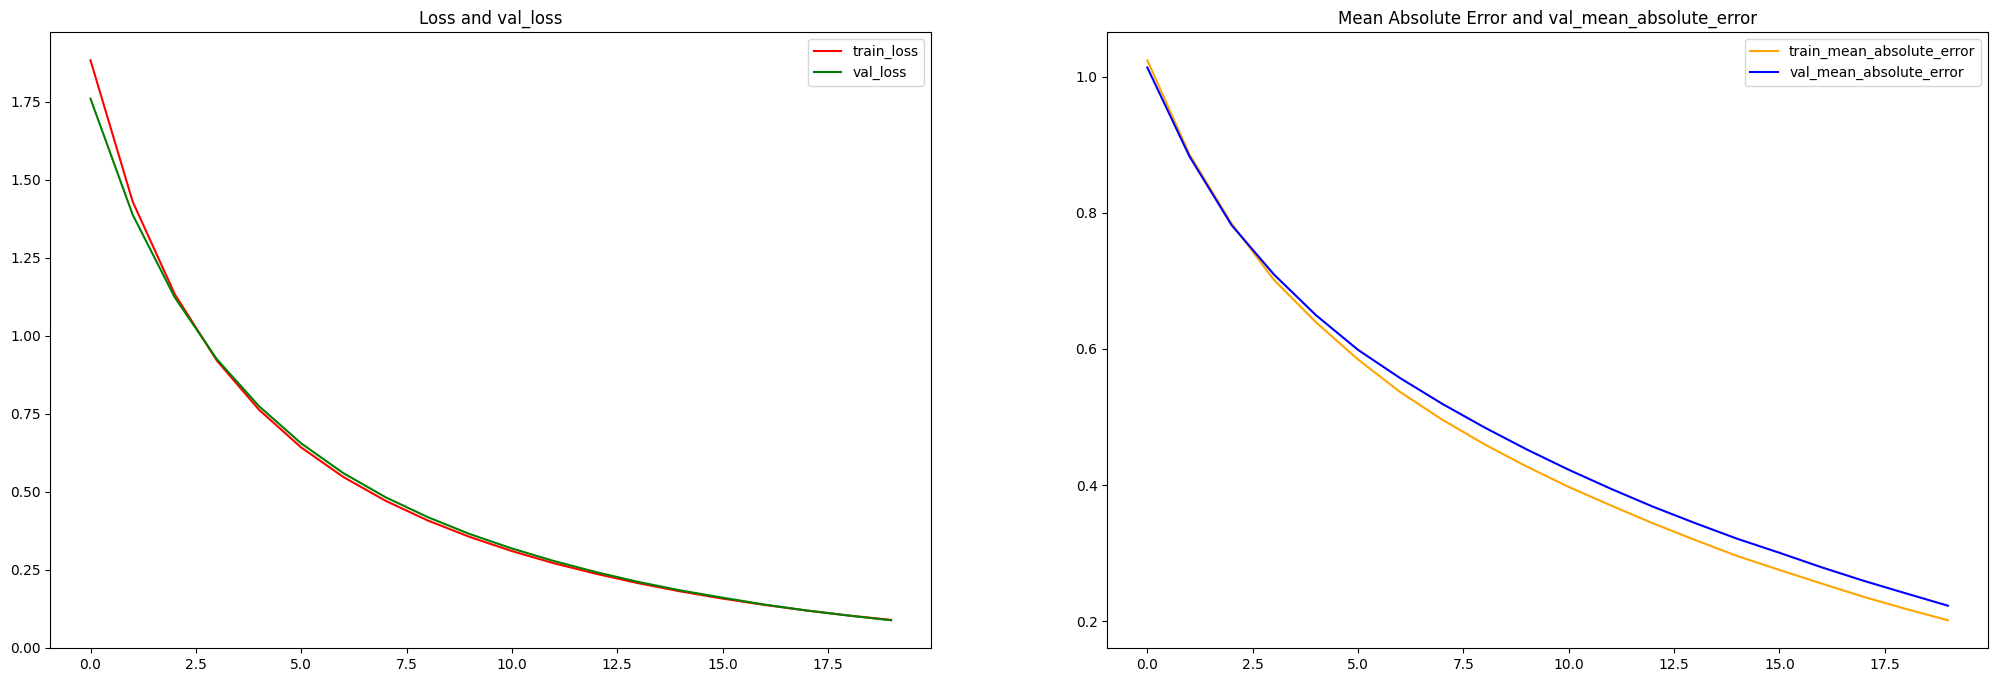

In [862]:
plot_function(history1)

####Model 2

In [863]:
inputs = Input(shape=(4,))
outputs = Dense(1)(inputs)
model2 = Model(inputs, outputs)

In [864]:
print(model2.summary())

Model: "model_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_46 (InputLayer)       [(None, 4)]               0         
                                                                 
 dense_234 (Dense)           (None, 1)                 5         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
None


In [865]:
model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

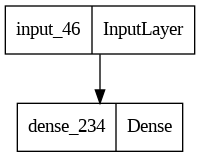

In [866]:
plot_model(model2)

In [867]:
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
37/37 [==============================] - 1s 7ms/step - loss: 0.9219 - mean_absolute_error: 0.6834 - mean_squared_error: 0.9219 - val_loss: 0.5576 - val_mean_absolute_error: 0.5754 - val_mean_squared_error: 0.5576
Epoch 2/50
37/37 [==============================] - 0s 2ms/step - loss: 0.8163 - mean_absolute_error: 0.6445 - mean_squared_error: 0.8163 - val_loss: 0.4808 - val_mean_absolute_error: 0.5365 - val_mean_squared_error: 0.4808
Epoch 3/50
37/37 [==============================] - 0s 3ms/step - loss: 0.7282 - mean_absolute_error: 0.6127 - mean_squared_error: 0.7282 - val_loss: 0.4185 - val_mean_absolute_error: 0.5074 - val_mean_squared_error: 0.4185
Epoch 4/50
37/37 [==============================] - 0s 3ms/step - loss: 0.6565 - mean_absolute_error: 0.5819 - mean_squared_error: 0.6565 - val_loss: 0.3698 - val_mean_absolute_error: 0.4859 - val_mean_squared_error: 0.3698
Epoch 5/50
37/37 [==============================] - 0s 3ms/step - loss: 0.5965 - mean_absolute_error: 0.

In [868]:
loss, mean_absolute_error, mean_squared_error = model2.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Mean Absolute Error:", mean_absolute_error)
print("Mean Squared Error:", mean_squared_error)

9/9 [==============================] - 0s 3ms/step - loss: 0.0261 - mean_absolute_error: 0.1075 - mean_squared_error: 0.0261
Test loss: 0.026125699281692505
Mean Absolute Error: 0.10754226893186569
Mean Squared Error: 0.026125699281692505


In [869]:
def plot_function(history):
  fig, ax = plt.subplots(1, 2, figsize=(25, 8))

  ax[0].plot(history.history['loss'], color='red', label='train_loss')
  ax[0].plot(history.history['val_loss'], color='green', label='val_loss')
  ax[0].set_title('Loss and val_loss')
  ax[0].legend()

  ax[1].plot(history.history['mean_absolute_error'], color='orange', label='train_mean_absolute_error')
  ax[1].plot(history.history['val_mean_absolute_error'], color='blue', label='val_mean_absolute_error')
  ax[1].set_title('Mean Absolute Error and val_mean_absolute_error')
  ax[1].legend()

  plt.show()

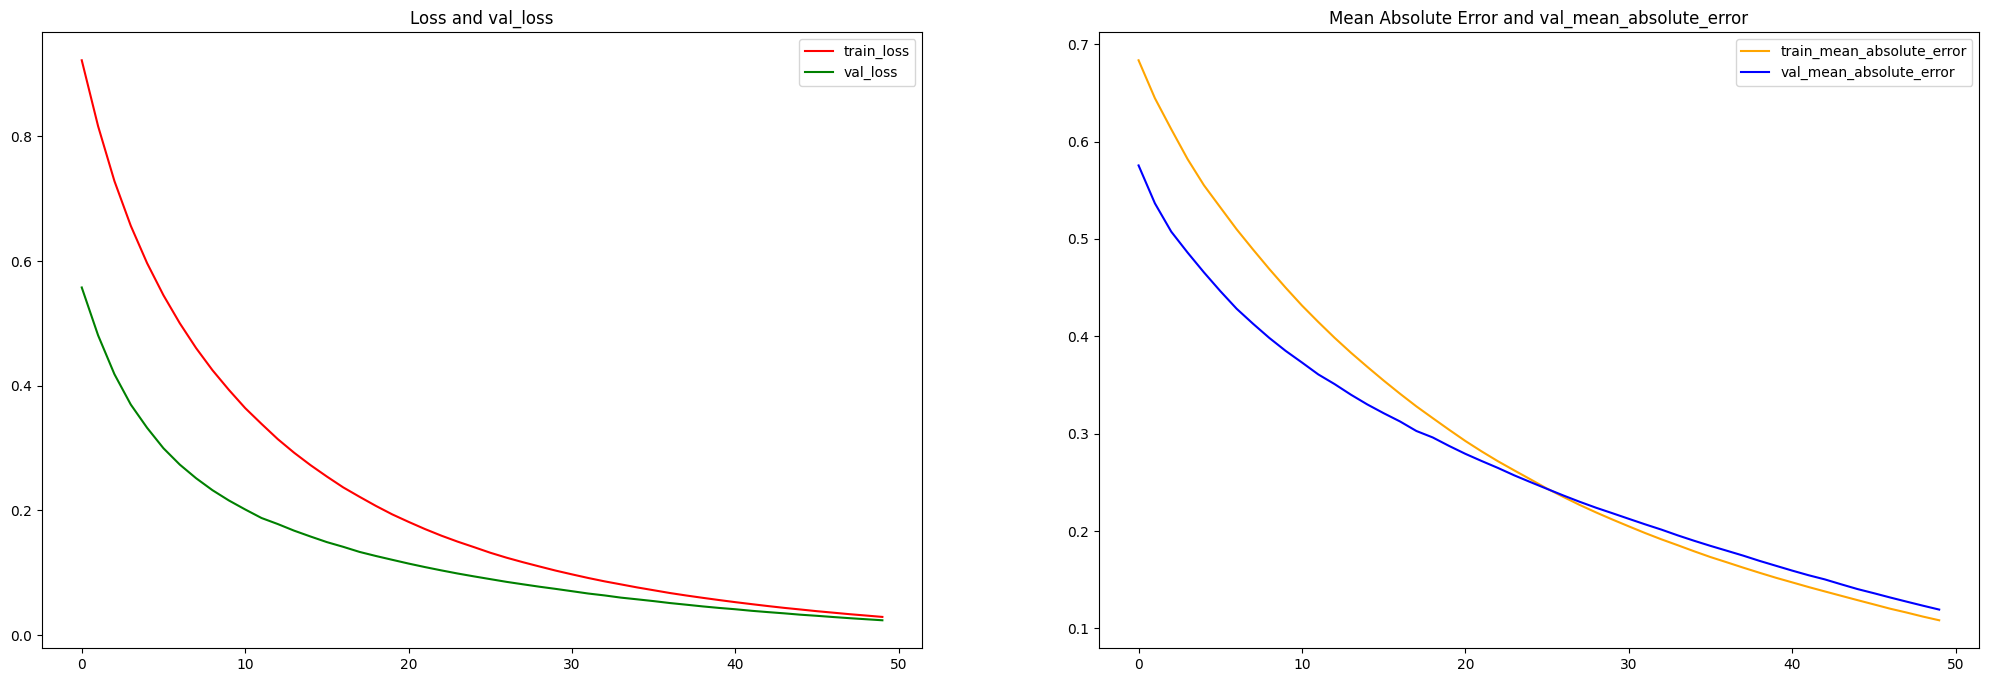

In [870]:
plot_function(history2)

####Model 3

In [879]:
inputs = Input(shape=(4,))
outputs = Dense(1)(inputs)
model3 = Model(inputs, outputs)

In [880]:
print(model3.summary())

Model: "model_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_48 (InputLayer)       [(None, 4)]               0         
                                                                 
 dense_236 (Dense)           (None, 1)                 5         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
None


In [881]:
model3.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

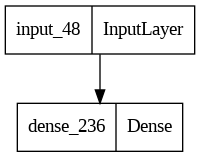

In [882]:
plot_model(model3)

In [883]:
history3 = model3.fit(X_train, y_train, epochs=100, batch_size=40, validation_data=(X_val, y_val))

Epoch 1/100
30/30 [==============================] - 1s 9ms/step - loss: 3.0352 - mean_absolute_error: 1.2652 - mean_squared_error: 3.0352 - val_loss: 1.8855 - val_mean_absolute_error: 1.0725 - val_mean_squared_error: 1.8855
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: 2.8236 - mean_absolute_error: 1.2195 - mean_squared_error: 2.8236 - val_loss: 1.7171 - val_mean_absolute_error: 1.0298 - val_mean_squared_error: 1.7171
Epoch 3/100
30/30 [==============================] - 0s 4ms/step - loss: 2.6299 - mean_absolute_error: 1.1774 - mean_squared_error: 2.6299 - val_loss: 1.5716 - val_mean_absolute_error: 0.9919 - val_mean_squared_error: 1.5716
Epoch 4/100
30/30 [==============================] - 0s 3ms/step - loss: 2.4612 - mean_absolute_error: 1.1398 - mean_squared_error: 2.4612 - val_loss: 1.4387 - val_mean_absolute_error: 0.9561 - val_mean_squared_error: 1.4387
Epoch 5/100
30/30 [==============================] - 0s 3ms/step - loss: 2.3063 - mean_absolute_erro

In [884]:
loss, mean_absolute_error, mean_squared_error = model3.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Mean Absolute Error:", mean_absolute_error)
print("Mean Squared Error:", mean_squared_error)

9/9 [==============================] - 0s 2ms/step - loss: 0.0275 - mean_absolute_error: 0.1091 - mean_squared_error: 0.0275
Test loss: 0.027498753741383553
Mean Absolute Error: 0.10914111882448196
Mean Squared Error: 0.027498753741383553


In [885]:
def plot_function(history):
  fig, ax = plt.subplots(1, 2, figsize=(25, 8))

  ax[0].plot(history.history['loss'], color='red', label='train_loss')
  ax[0].plot(history.history['val_loss'], color='green', label='val_loss')
  ax[0].set_title('Loss and val_loss')
  ax[0].legend()

  ax[1].plot(history.history['mean_absolute_error'], color='orange', label='train_mean_absolute_error')
  ax[1].plot(history.history['val_mean_absolute_error'], color='blue', label='val_mean_absolute_error')
  ax[1].set_title('Mean Absolute Error and val_mean_absolute_error')
  ax[1].legend()

  plt.show()

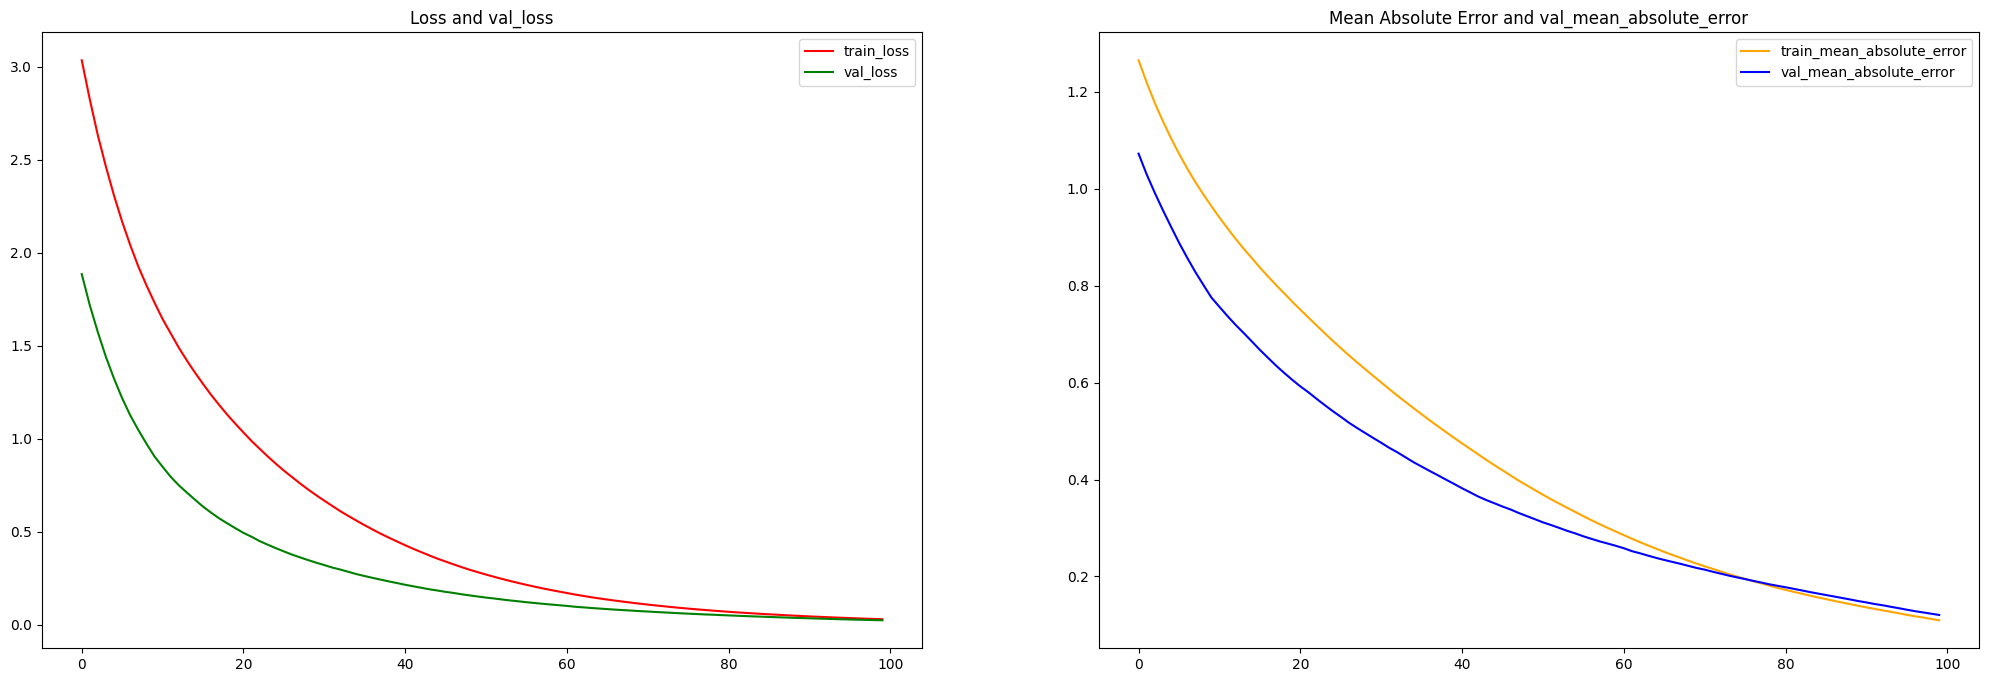

In [886]:
plot_function(history3)

Conclusion: Model 2 performs slightly better than Model 1 and 3, indicating that average number of epochs and batch size is preferable, neither too high nor too low.